# **Human Activity Recognition Using Smartphones**


### **Name :** Ameera Banu Parayil
### **Organization :** Entri Elevate
### **Date :** 20-02-2025



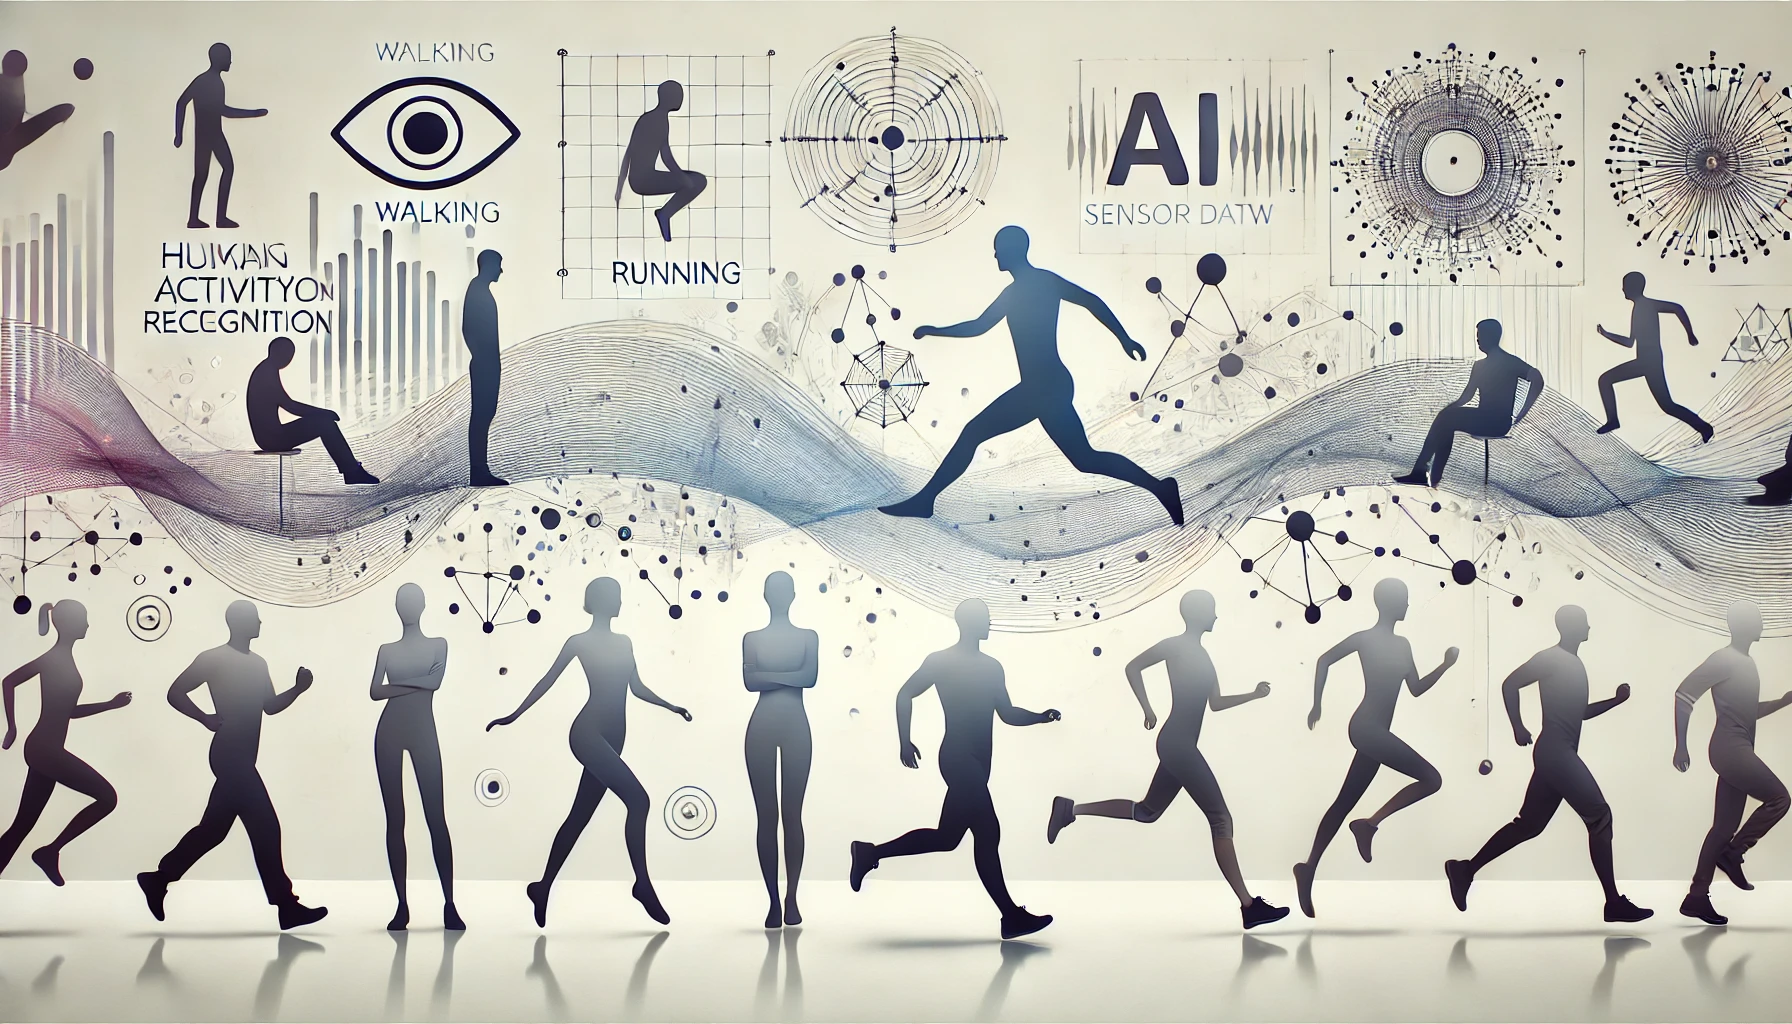

## **Overview of Problem Statement**
The project focuses on Human Activity Recognition (HAR) using smartphone sensor data. The primary goal is to classify six different activities: standing, sitting, laying, walking, walking upstairs, and walking downstairs. The dataset is collected from 30 participants, capturing their activity data from smartphone sensors such as accelerometers and gyroscopes. Using this data, machine learning algorithms will classify the activity of a person based on the sensor readings.


## **Objective:**
The objective of this project is to develop a machine learning model that can accurately predict the type of activity a person is engaged in, using smartphone sensor data. By analyzing features extracted from raw sensor signals, such as accelerometer and gyroscope readings in different axes, the model will be trained to recognize and classify six distinct human activities. This system can have various real-world applications, including healthcare monitoring, fitness tracking, and smart environments where knowing a person’s activity can trigger automated responses.

## **Data Description**
#### **Source** : Kaggle HAR Dataset
https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones
### **Features**:.

The Human Activity Recognition (HAR) dataset consists of sensor data collected from smartphones, capturing motion patterns to classify different physical activities. It includes train and test datasets with 562 features, derived from accelerometer and gyroscope measurements. These features represent time-domain and frequency-domain characteristics, including statistical properties, signal magnitudes, and transformations that help distinguish activities like walking, sitting, standing, and laying.
















#### **Accelerometer-based Features**
Mean: Average value across X, Y, Z axes.

Standard Deviation: Measures spread or variability.

Max/Min: Highest/lowest values observed.

SMA: Magnitude of the signal, summarizing overall movement.

Energy: Sum of squared values, indicating intensity.

IQR: Range between first and third quartiles.

Entropy: Measures complexity/randomness.
AR Coefficients: Temporal patterns in signal.

Correlation: Relationship between signal axes.

#### **Gyroscope-based Features**
Mean: Average angular velocity across X, Y, Z.

Standard Deviation: Measures spread of rotational data.

Max/Min: Highest/lowest angular velocities.

SMA: Magnitude of rotational signal.
Energy: Rotational energy (sum of squared values).

IQR: Range between quartiles for angular data.

Entropy: Measures unpredictability in rotation.

AR Coefficients: Captures temporal dependencies.

Correlation: Relationship between rotational axes.

#### **Magnitude-based Features**

Mean: Average signal magnitude.

Standard Deviation: Spread of signal magnitude.

Max/Min: Highest/lowest magnitude values.

SMA: Summarizes overall magnitude intensity.

Energy: Magnitude energy (sum of squared values).

IQR: Range between quartiles for magnitude.

Entropy: Complexity or randomness of magnitude.

AR Coefficients: Autoregressive model for magnitude.


#### **Frequency-based Features**
Mean: Average frequency components.

Standard Deviation: Spread of frequency data.

Max/Min: Highest/lowest frequencies.

SMA: Magnitude of frequency components.

Energy: Frequency domain energy (sum of squared values).

IQR: Range between frequency quartiles.
Entropy: Frequency randomness.

Mean Frequency: Average frequency per axis.

Skewness/Kurtosis: Asymmetry and tail behavior in frequency distribution.

Band Energy: Energy in specific frequency bands.


**Subjects:** refers to the participants. there are 30 subjects referring to 30 participants.

### **Targets**




The dataset includes six target labels representing different human activities recorded through smartphone sensors:

* Standing – The person is in an upright stationary position.
* Sitting – The person is seated with minimal movement.
* Laying – The person is lying down with little to no motion.
* Walking – The person moves forward at a regular pace on a flat surface.
* Walking Upstairs – The person moves upward using stairs, involving increased vertical motion.
* Walking Downstairs – The person descends stairs with controlled downward steps.

These activities are classified using accelerometer and gyroscope data, making the dataset useful for applications in activity monitoring, healthcare, and wearable technology.

## **Data Collection**

In [15]:
# Loading Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import joblib

In [16]:
import pandas as pd
train_data = pd.read_csv(r"C:\Users\BIT LOGIC\Downloads\train.csv")
test_data = pd.read_csv(r"C:\Users\BIT LOGIC\Downloads\test.csv")
train_data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [17]:
test_data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   
1         -0.945823         -0.894088  ...                        -0.594944   
2         -0.963483         -0.939260  ...                        -0.640736   
3         -0.968897         -0.938610  ...                        -0.736124   
4         -0.977346         -0.938610  ...                        -0.846595   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                              0.162920   
1                    -0.083495                              0.017500   
2                    -0.034956                              0.202302   
3                    -0.017067                              0.154438   
4                    -0.002223                             -0.040046   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   
1                         -0.434375                              0.920593   
2                          0.064103                              0.145068   
3                          0.340134                              0.296407   
4                          0.736715                             -0.118545   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   
1             -0.698091              0.281343             -0.083898        2   
2             -0.702771              0.280083             -0.079346        2   
3             -0.698954              0.284114             -0.077108        2   
4             -0.692245              0.290722             -0.073857        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [19]:
train_data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   
25%           -0.992754         -0.978129         -0.980233         -0.993591   
50%           -0.946196         -0.851897         -0.859365         -0.950709   
75%           -0.242813         -0.034231         -0.262415         -0.292680   
max            1.000000          0.916238          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       7352.000000       7352.000000       7352.000000  ...   
mean          -0.526907         -0.606150         -0.468604  ...   
std            0.485942          0.414122          0.544547  ...   
min           -1.000000         -1.000000         -1.000000  ...   
25%           -0.978162         -0.980251         -0.936219  ...   
50%           -0.857328         -0.857143         -0.881637  ...   
75%           -0.066701         -0.265671         -0.017129  ...   
max            0.967664          1.000000          1.000000  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                      7352.000000                      7352.000000   
mean                         -0.307009                        -0.625294   
std                           0.321011                         0.307584   
min                          -0.995357                        -0.999765   
25%                          -0.542602                        -0.845573   
50%                          -0.343685                        -0.711692   
75%                          -0.126979                        -0.503878   
max                           0.989538                         0.956845   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                  7352.000000                           7352.000000   
mean                      0.008684                              0.002186   
std                       0.336787                              0.448306   
min                      -0.976580                             -1.000000   
25%                      -0.121527                             -0.289549   
50%                       0.009509                              0.008943   
75%                       0.150865                              0.292861   
max                       1.000000                              1.000000   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                       7352.000000                           7352.000000   
mean                           0.008726                             -0.005981   
std                            0.608303                              0.477975   
min                           -1.000000                             -1.000000   
25%                           -0.482273                             -0.376341   
50%                            0.008735                             -0.000368   
75%                            0.506187                              0.359368   
max                            0.998702                     

From the description, it is clear that there is some skewness in the train data which nedds to be handled using appropriate measures.

In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [22]:
test_data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        2947.000000        2947.000000        2947.000000   
mean            0.273996          -0.017863          -0.108386   
std             0.060570           0.025745           0.042747   
min            -0.592004          -0.362884          -0.576184   
25%             0.262075          -0.024961          -0.121162   
50%             0.277113          -0.016967          -0.108458   
75%             0.288097          -0.010143          -0.097123   
max             0.671887           0.246106           0.494114   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.613635         -0.508330         -0.633797         -0.641278   
std            0.412597          0.494269          0.362699          0.385199   
min           -0.999606         -1.000000         -0.998955         -0.999417   
25%           -0.990914         -0.973664         -0.976122         -0.992333   
50%           -0.931214         -0.790972         -0.827534         -0.937664   
75%           -0.267395         -0.105919         -0.311432         -0.321719   
max            0.465299          1.000000          0.489703          0.439657   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       2947.000000       2947.000000       2947.000000  ...   
mean          -0.522676         -0.637038         -0.462063  ...   
std            0.479899          0.357753          0.523916  ...   
min           -0.999914         -0.998899         -0.952357  ...   
25%           -0.974131         -0.975352         -0.934447  ...   
50%           -0.799907         -0.817005         -0.852659  ...   
75%           -0.133488         -0.322771         -0.009965  ...   
max            1.000000          0.427958          0.786436  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                      2947.000000                      2947.000000   
mean                         -0.277593                        -0.598756   
std                           0.317245                         0.311042   
min                          -1.000000                        -1.000000   
25%                          -0.517494                        -0.829593   
50%                          -0.311023                        -0.683672   
75%                          -0.083559                        -0.458332   
max                           1.000000                         1.000000   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                  2947.000000                           2947.000000   
mean                      0.005264                              0.003799   
std                       0.336147                              0.445077   
min                      -1.000000                             -0.993402   
25%                      -0.130541                             -0.282600   
50%                       0.005188                              0.006767   
75%                       0.146200                              0.288113   
max                       0.998898                              0.986347   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                       2947.000000                           2947.000000   
mean                           0.040029                             -0.017298   
std                            0.634989                              0.501311   
min                           -0.998898                             -0.991096   
25%                           -0.518924                             -0.428375   
50%                            0.047113                             -0.026726   
75%                            0.622151                              0.394387   
max                            1.000000                     

Test data also indicates presence of skewness which can be handled to an extent by removing outliers.

## **Data Preprocessing**

In [25]:
train_data.isnull().sum()



tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [26]:
test_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [27]:
train_data.duplicated().sum()

0

In [28]:
test_data.duplicated().sum()

0

Renamed columns in train and test data

In [30]:
train_data.rename(columns={
    "fBodyBodyGyroJerkMag-skewness()": "fBodyGyroJerkMag-skewness()",
    "fBodyBodyGyroJerkMag-kurtosis()": "fBodyGyroJerkMag-kurtosis()"
}, inplace=True)

test_data.rename(columns={
    "fBodyBodyGyroJerkMag-skewness()": "fBodyGyroJerkMag-skewness()",
    "fBodyBodyGyroJerkMag-kurtosis()": "fBodyGyroJerkMag-kurtosis()"
}, inplace=True)

train_data.head()


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                    -0.710304   
1         -0.957686         -0.943068  ...                    -0.861499   
2         -0.977469         -0.938692  ...                    -0.760104   
3         -0.989302         -0.938692  ...                    -0.482845   
4         -0.990441         -0.942469  ...                    -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [31]:
train_data.shape

(7352, 563)

In [32]:
test_data.shape

(2947, 563)


* There is neither null values nor duplicates in both train and test data.
* There is 7352 rows and 563 columns in train data.
* There is 2947 rows and 563 columns in test data.


### Outlier Detection and Handling

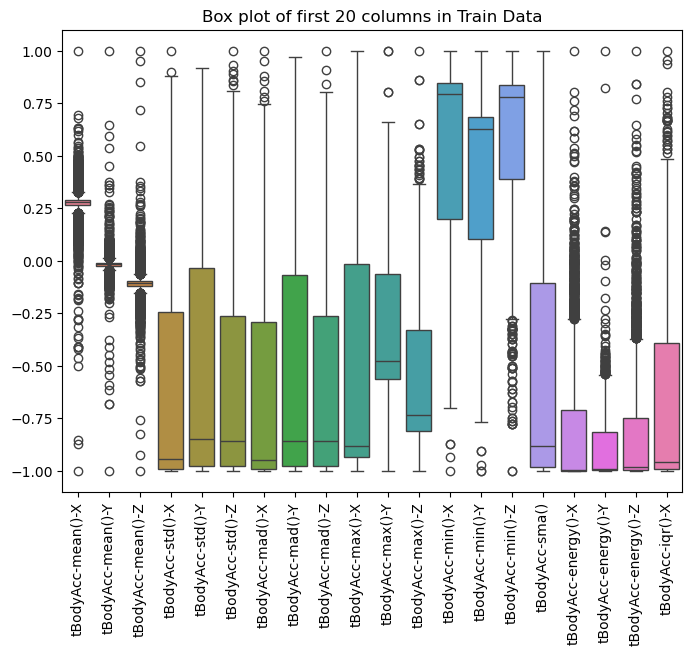

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(train_data.iloc[:,:20])
plt.xticks(rotation=90)
plt.title("Box plot of first 20 columns in Train Data")
plt.show()


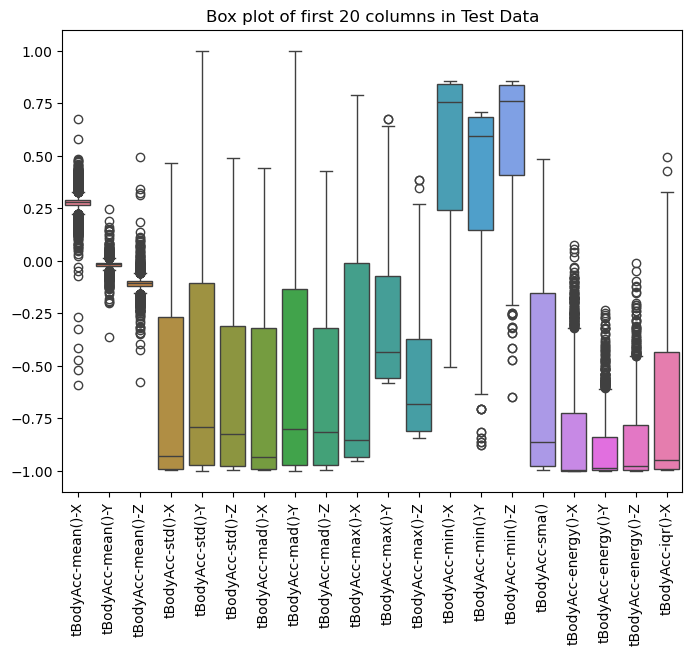

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(test_data.iloc[:,:20])
plt.xticks(rotation=90)
plt.title("Box plot of first 20 columns in Test Data")
plt.show()

### Box plots of first 15 columns indicate presence of outliers in train data and test data and it needs to be handled by capping with respective lower bound and upper bound values.

In [38]:
# train data skewness before handling outliers.
train_data.skew(numeric_only=True).sort_values(ascending=False).head(20)


fBodyAccJerk-bandsEnergy()-57,64      14.706052
fBodyGyro-bandsEnergy()-33,40.1       12.342214
tGravityAcc-iqr()-X                   12.189739
tGravityAcc-mad()-X                   11.055512
tGravityAcc-std()-X                   10.705522
fBodyGyro-bandsEnergy()-33,48.1       10.314053
fBodyGyro-bandsEnergy()-33,40.2        9.871032
tGravityAcc-iqr()-Y                    9.689246
tGravityAcc-mad()-Y                    9.125358
fBodyGyro-bandsEnergy()-33,48.2        9.028931
tGravityAcc-std()-Y                    8.958501
fBodyAccJerk-bandsEnergy()-57,64.1     8.817936
fBodyGyro-bandsEnergy()-25,48.2        8.513261
fBodyGyro-bandsEnergy()-57,64          8.456516
fBodyAccJerk-bandsEnergy()-57,64.2     8.100085
fBodyGyro-bandsEnergy()-25,32.2        8.081339
fBodyGyro-bandsEnergy()-57,64.1        8.055903
fBodyGyro-bandsEnergy()-57,64.2        7.931862
fBodyGyro-bandsEnergy()-25,48.1        7.851988
fBodyAccJerk-bandsEnergy()-33,40.2     7.753596
dtype: float64

In [39]:
# test data skewness before handling outliers.
test_data.skew(numeric_only=True).sort_values(ascending=False).head(20)

tGravityAcc-iqr()-X                   12.743187
tGravityAcc-mad()-X                   12.489438
tGravityAcc-std()-X                   12.266403
fBodyGyro-bandsEnergy()-57,64.1        8.598758
fBodyGyro-bandsEnergy()-33,40.2        7.526194
fBodyGyro-bandsEnergy()-57,64.2        7.326737
fBodyAccJerk-bandsEnergy()-57,64.1     6.978501
fBodyGyro-bandsEnergy()-57,64          6.474909
tGravityAcc-iqr()-Z                    6.455082
tGravityAcc-mad()-Z                    6.436472
tGravityAcc-std()-Z                    6.384341
tGravityAcc-std()-Y                    6.271495
tGravityAcc-mad()-Y                    6.173702
fBodyGyro-bandsEnergy()-33,48.2        6.099409
tGravityAcc-iqr()-Y                    6.055257
fBodyAccJerk-bandsEnergy()-57,64.2     6.022459
fBodyAcc-bandsEnergy()-57,64.1         5.972906
fBodyGyro-bandsEnergy()-49,64.2        5.958104
fBodyGyro-bandsEnergy()-49,64.1        5.831909
fBodyGyro-bandsEnergy()-49,64          5.726940
dtype: float64

#### Skewness also suggests the presence of outliers which is high in more than 20 columns in both train data and test data.
#### Outliers are handled by clipping with lower bound and upper bound values which are found using inter quartile range(iqr) by creating a function streamline the process for handling outliers .

In [41]:
import numpy as np
# Creating a function for clipping outliers using IQR method
def clip_outliers_iqr(df):
    '''to cap outliers using inter quartile range'''
    df_clip = df.copy()
    num = df_clip.select_dtypes(include="number").columns # selecting numerical column

    Q1 = df_clip[num].quantile(0.25)
    Q3 = df_clip[num].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clip[num]= df_clip[num].clip(lower=lower_bound, upper=upper_bound, axis=1)  # Capping outliers
    return df_clip

# Applying function on both data
train_data=clip_outliers_iqr(train_data)
test_data = clip_outliers_iqr(test_data)
print("train data shape =",train_data.shape)
print("test data shape =",test_data.shape)

train data shape = (7352, 563)
test data shape = (2947, 563)


### Skewness in Train and Test Data After Handling Outliers.




In [43]:
train_data.skew(numeric_only=True).sort_values(ascending=False)

fBodyAcc-maxInds-Z                    1.324347
fBodyAccJerk-energy()-Z               1.276523
tBodyAccJerk-energy()-Z               1.276450
fBodyAccJerk-bandsEnergy()-17,32.2    1.271943
tBodyGyroJerkMag-energy()             1.265727
                                        ...   
tGravityAcc-energy()-X               -1.094595
tGravityAcc-mean()-X                 -1.096498
tGravityAcc-min()-X                  -1.104342
tGravityAcc-max()-X                  -1.110014
tBodyGyroJerk-min()-Y                -1.195303
Length: 562, dtype: float64

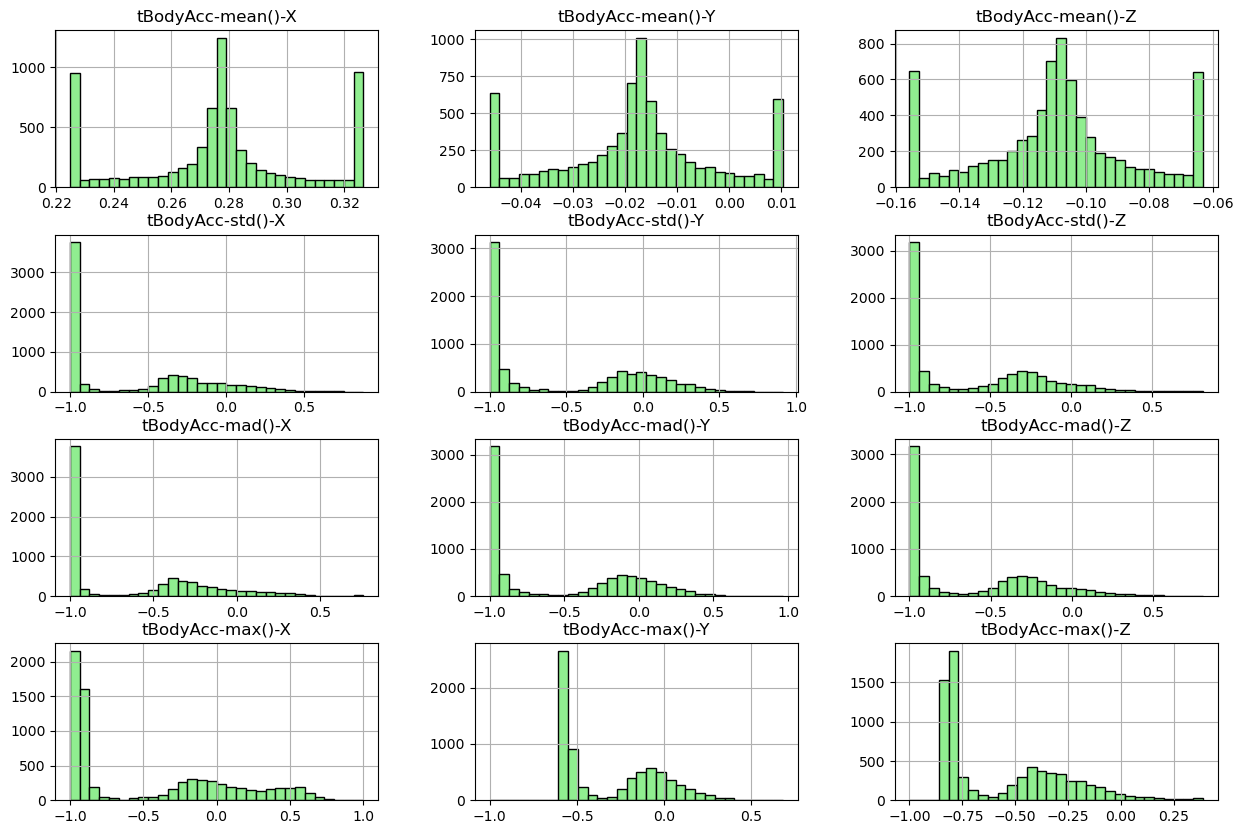

In [44]:
# Histogram of first 12 columns in train data.
num_columns=train_data.select_dtypes(include="number").columns
train_data[num_columns[:12]].hist(figsize=(15, 10), bins=30,color="lightgreen",edgecolor="black")
plt.show()

In [45]:
# Skewness of test data after habdling outliers
test_data.skew(numeric_only=True).sort_values(ascending=False)

fBodyGyro-maxInds-Y                1.531359
tGravityAcc-entropy()-Y            1.343513
fBodyGyro-bandsEnergy()-17,32.1    1.277766
tBodyGyroJerk-energy()-Y           1.274525
fBodyGyro-bandsEnergy()-25,48.1    1.269703
                                     ...   
tGravityAcc-max()-X               -1.100109
tGravityAcc-energy()-X            -1.105926
tGravityAcc-mean()-X              -1.107349
tGravityAcc-min()-X               -1.110957
tBodyGyroJerk-min()-Y             -1.202699
Length: 562, dtype: float64

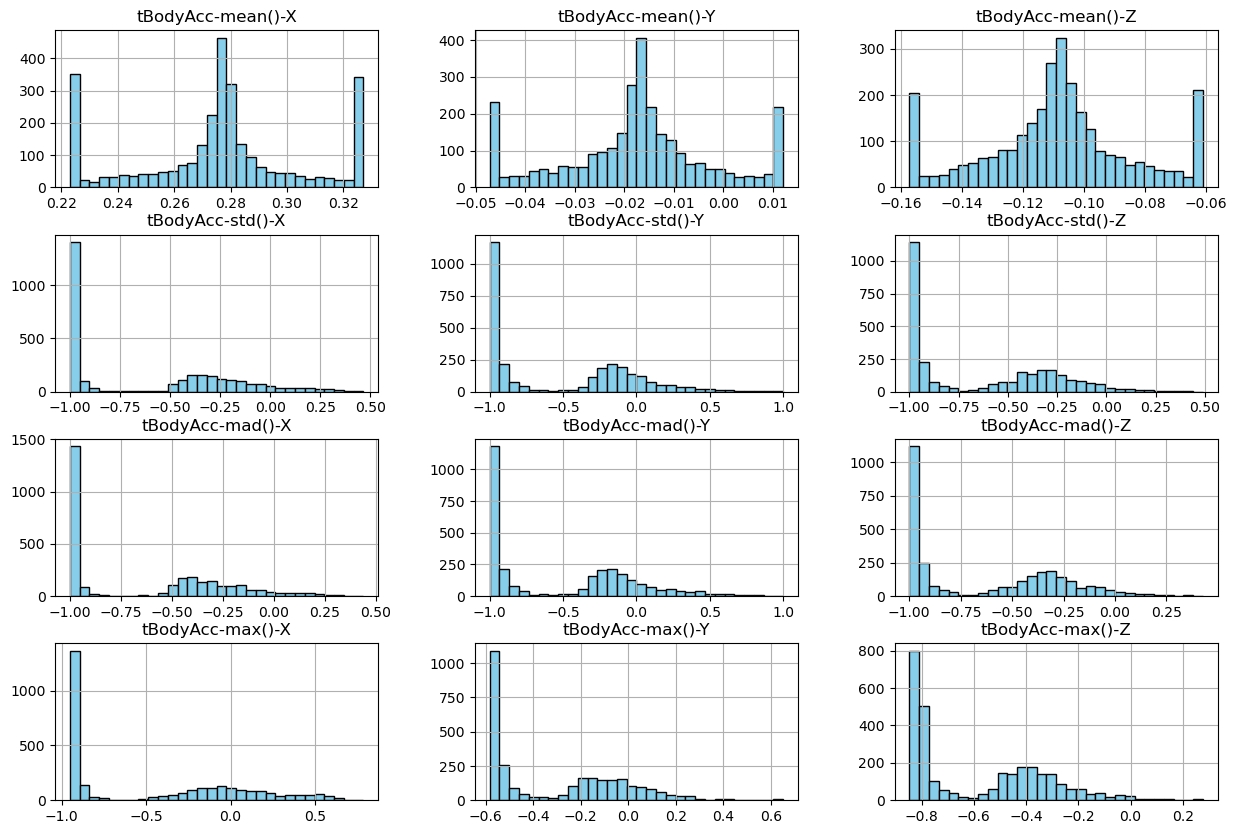

In [46]:
# Histogram for first 12 columns in test data.
num_column=test_data.select_dtypes(include="number").columns
test_data[num_columns[:12]].hist(figsize=(15, 10), bins=30,color="skyblue", edgecolor='black')
plt.show()

#### Histogram of first 12 columns in both training data and testing data shows positive skewness. But also from applying skew function, results show both positive and negative skewness which needs to be reduced. Log and square root cannot be applied as it contain negative values.About 391 columns in train data and 377 columns in test data have skewness .By using Yeo_Johnson ,which can be applied to both positive and neqative values, Skewness have been reduced to an extent.

In [48]:
# Apply skew function to numerical columns
from scipy.stats import skew
skewed_features_train = train_data[num_columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Ensure we extract column names properly
skewed_columns_train = skewed_features_train[abs(skewed_features_train) > 0.5].index
skewed_columns_train

Index(['fBodyAcc-maxInds-Z', 'fBodyAccJerk-energy()-Z',
       'tBodyAccJerk-energy()-Z', 'fBodyAccJerk-bandsEnergy()-17,32.2',
       'tBodyGyroJerkMag-energy()', 'fBodyBodyGyroJerkMag-energy()',
       'fBodyAccJerk-min()-Z', 'fBodyAccJerk-min()-Y',
       'fBodyGyro-bandsEnergy()-25,48', 'fBodyAccJerk-bandsEnergy()-25,32.2',
       ...
       'tBodyGyro-min()-Y', 'tBodyAccJerk-min()-Z', 'tBodyGyro-min()-X',
       'angle(Y,gravityMean)', 'tBodyGyroJerk-min()-Z',
       'tGravityAcc-energy()-X', 'tGravityAcc-mean()-X', 'tGravityAcc-min()-X',
       'tGravityAcc-max()-X', 'tBodyGyroJerk-min()-Y'],
      dtype='object', length=391)

In [49]:
# Apply yeo Johnson method to the skewed columns in train data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
train_data[skewed_columns_train] = pt.fit_transform(train_data[skewed_columns_train])

# print skewness after applying yeo johnson
train_data.skew(numeric_only=True).sort_values(ascending=False)

C:\Users\BIT LOGIC\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


tGravityAcc-entropy()-Y             1.105276
fBodyAcc-bandsEnergy()-57,64        0.827906
fBodyAccJerk-bandsEnergy()-57,64    0.822063
fBodyGyro-bandsEnergy()-57,64.1     0.801656
fBodyGyro-bandsEnergy()-57,64       0.801479
                                      ...   
tBodyGyroJerk-min()-Y              -0.481562
tGravityAcc-min()-X                -0.568416
tGravityAcc-mean()-X               -0.581045
tGravityAcc-max()-X                -0.583489
tGravityAcc-energy()-X             -0.649139
Length: 562, dtype: float64

In [50]:
# Apply skew function to numerical columns in test data
skewed_features_test = test_data[num_column].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Ensure we extract column names properly
skewed_columns_test = skewed_features_test[abs(skewed_features_test) > 0.5].index
skewed_columns_test

Index(['fBodyGyro-maxInds-Y', 'tGravityAcc-entropy()-Y',
       'fBodyGyro-bandsEnergy()-17,32.1', 'tBodyGyroJerk-energy()-Y',
       'fBodyGyro-bandsEnergy()-25,48.1', 'fBodyAcc-bandsEnergy()-25,32.1',
       'fBodyGyro-maxInds-X', 'fBodyAccJerk-min()-Y', 'fBodyAccJerk-min()-X',
       'fBodyGyro-bandsEnergy()-9,16.1',
       ...
       'tBodyGyro-min()-X', 'tBodyGyroJerk-min()-X', 'tBodyAcc-min()-Z',
       'tBodyGyroJerk-min()-Z', 'tBodyGyro-min()-Y', 'tGravityAcc-max()-X',
       'tGravityAcc-energy()-X', 'tGravityAcc-mean()-X', 'tGravityAcc-min()-X',
       'tBodyGyroJerk-min()-Y'],
      dtype='object', length=377)

In [51]:
# print skewness in test data after fitting with Power transformer

test_data[skewed_columns_test] = pt.fit_transform(test_data[skewed_columns_test])
test_data.skew(numeric_only=True).sort_values(ascending=False)

C:\Users\BIT LOGIC\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


tGravityAcc-entropy()-Y             1.057907
fBodyAcc-bandsEnergy()-57,64        0.819138
fBodyGyro-bandsEnergy()-57,64       0.791720
fBodyAccJerk-bandsEnergy()-57,64    0.790447
fBodyAcc-bandsEnergy()-57,64.2      0.788891
                                      ...   
tBodyGyroJerk-min()-Y              -0.471007
tGravityAcc-max()-X                -0.490084
tGravityAcc-min()-X                -0.531563
tGravityAcc-mean()-X               -0.550418
tGravityAcc-energy()-X             -0.602879
Length: 562, dtype: float64

## **Exploratory Data Analysis**

### 1.Count plot

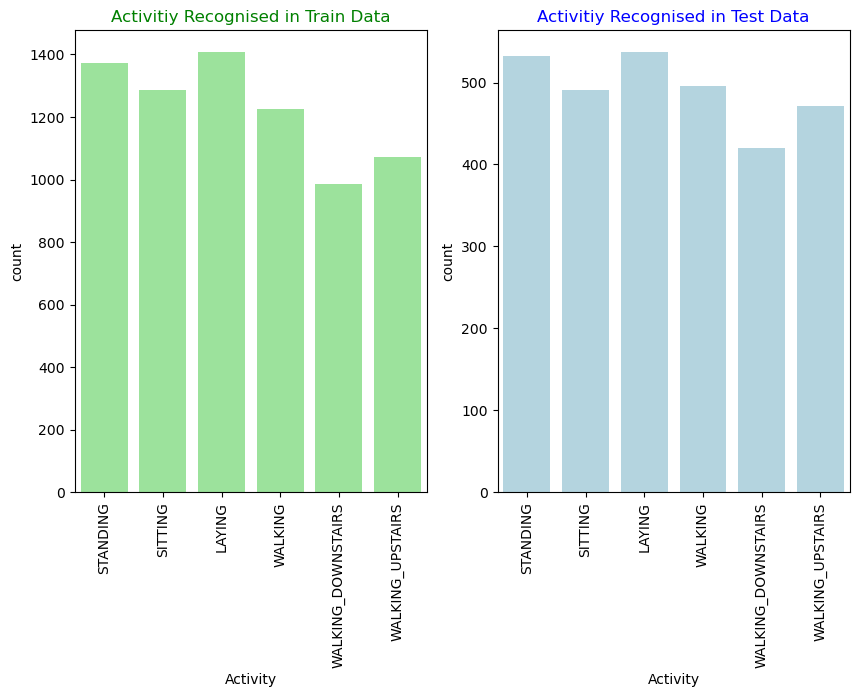

In [54]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x=train_data["Activity"],color="lightgreen")
plt.xticks(rotation=90)
plt.title("Activitiy Recognised in Train Data",color="g")

plt.subplot(1,2,2)
sns.countplot(x=test_data["Activity"],color="lightblue")
plt.xticks(rotation=90)
plt.title("Activitiy Recognised in Test Data",color="b")
plt.show()

### Insights:
* In both training data and test data,  laying is the most predominant activity
* The least recognised activity is walking downstairs .
* More  values are recognised as walking in test data, which is more than that of sitting , compared that of train data.

### 2. Histogram

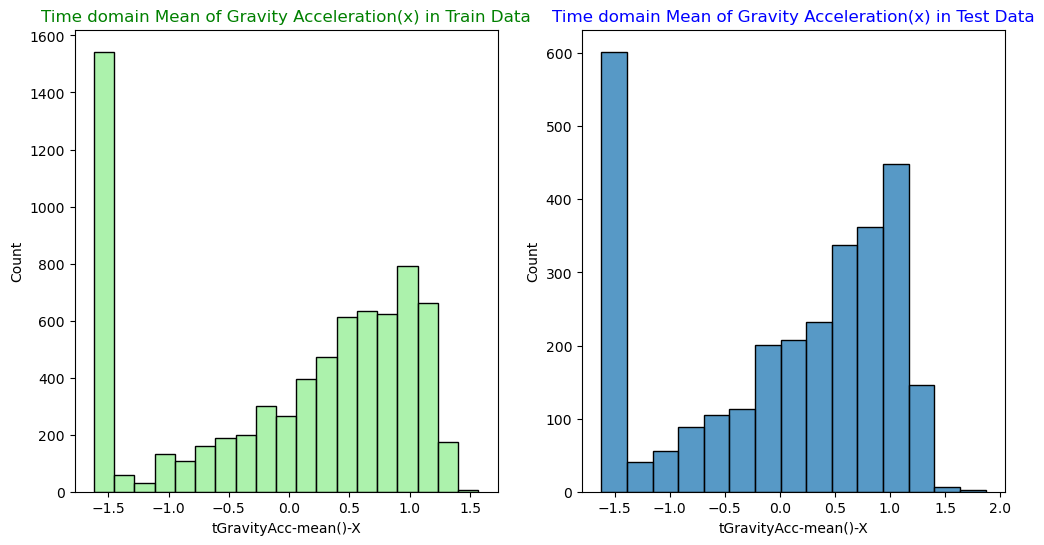

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(train_data["tGravityAcc-mean()-X"],color="lightgreen")
plt.title("Time domain Mean of Gravity Acceleration(x) in Train Data",color="g")

plt.subplot(1,2,2)
sns.histplot(test_data["tGravityAcc-mean()-X"])
plt.title("Time domain Mean of Gravity Acceleration(x) in Test Data",color="b")
plt.show()

### Insights :
Histogram of mean of time domain acceleration in x axis  is almost same for the both the datasets with only slight variations.

### 3.Scatterplot

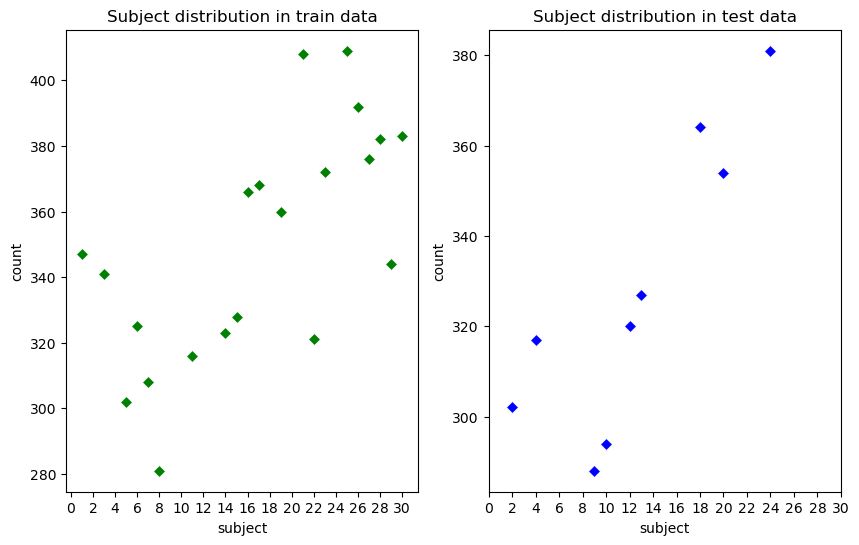

In [60]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
count_sub_tr = pd.DataFrame(train_data["subject"].value_counts())
sns.scatterplot(count_sub_tr,x="subject",y="count",color="g",marker="D")
plt.xticks(np.arange(0,31,2))
plt.title("Subject distribution in train data")


plt.subplot(1,2,2)
count_sub = pd.DataFrame(test_data["subject"].value_counts())
sns.scatterplot(count_sub,x="subject",y="count",color="b",marker="D")
plt.xticks(np.arange(0,31,2))
plt.title("Subject distribution in test data")
plt.show()

### Insights:
In training data , from 21 subjects ,highest number of readings are from subject 25 and then 21. lowest number of readings are from subject 8 .

In test data,which consists of 9 subjects, highest number of readings is from subject 24 and lowest from subject 9.

### 5.Pie Graph

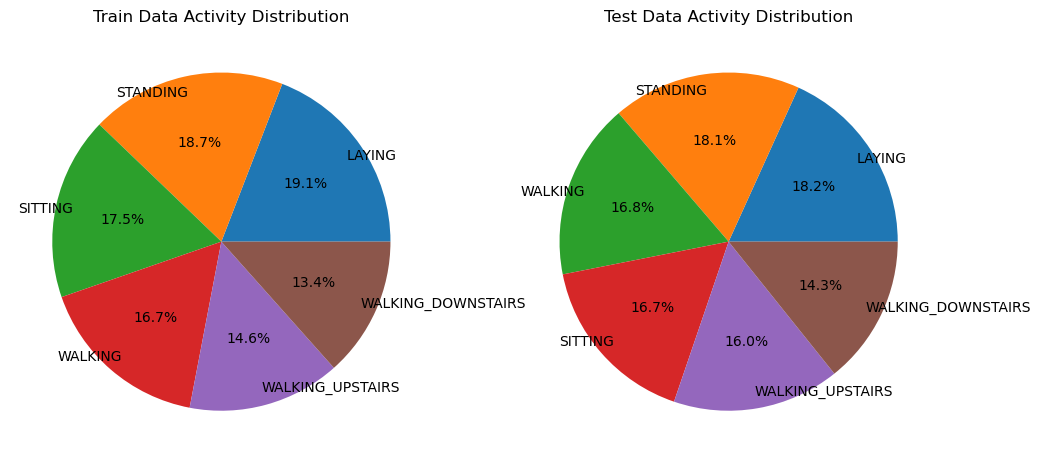

In [63]:
train_Act = pd.DataFrame(train_data["Activity"].value_counts())
test_Act = pd.DataFrame(test_data["Activity"].value_counts())

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(x="count",data=train_Act,labels=train_Act.index,autopct='%1.1f%%',labeldistance=0.9)
plt.title("Train Data Activity Distribution")


plt.subplot(1,2,2)
plt.pie(x="count",data=test_Act,labels=test_Act.index,autopct='%1.1f%%',labeldistance=0.9)
plt.title("Test Data Activity Distribution")
plt.show()

### Insights:
* There is not much visible difference with train data and test data.
* Some values are less or more by 2 percent in the datasets.
* In test data,  walking upstairs values are more and walking percent is same for both train and test data.


### 6.Bar Plot for Activity Distribution

In [66]:
activity_counts = pd.DataFrame(train_data.groupby(['subject', 'Activity']).size().reset_index(name='count'))
activity_counts

subject            Activity  count
0          1              LAYING     50
1          1             SITTING     47
2          1            STANDING     53
3          1             WALKING     95
4          1  WALKING_DOWNSTAIRS     49
..       ...                 ...    ...
121       30             SITTING     62
122       30            STANDING     59
123       30             WALKING     65
124       30  WALKING_DOWNSTAIRS     62
125       30    WALKING_UPSTAIRS     65

[126 rows x 3 columns]

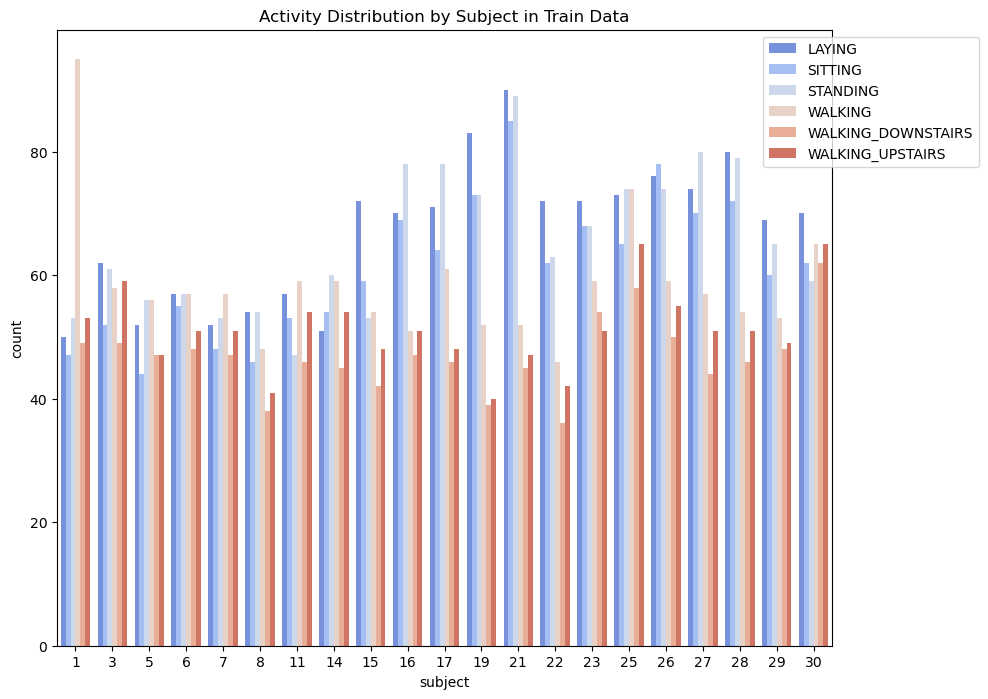

In [67]:
plt.figure(figsize=(10,8))
sns.barplot(activity_counts,x="subject",y="count",hue="Activity",palette="coolwarm")
plt.title("Activity Distribution by Subject in Train Data")
plt.legend(loc='upper center', bbox_to_anchor=(1.05, 1))
plt.show()


#### Insights:
* From the graph, It is easy to analyse what activity is frequently done by each subject .'
* Subject 1's most frequent activity is walking and that for 21 is laying.
* It is clear most subjects prefer standing, sitting or laying .



In [69]:
activity_count = pd.DataFrame(test_data.groupby(['subject', 'Activity']).size().reset_index(name='count'))
activity_count

subject            Activity  count
0         2              LAYING     48
1         2             SITTING     46
2         2            STANDING     54
3         2             WALKING     59
4         2  WALKING_DOWNSTAIRS     47
5         2    WALKING_UPSTAIRS     48
6         4              LAYING     54
7         4             SITTING     50
8         4            STANDING     56
9         4             WALKING     60
10        4  WALKING_DOWNSTAIRS     45
11        4    WALKING_UPSTAIRS     52
12        9              LAYING     50
13        9             SITTING     50
14        9            STANDING     45
15        9             WALKING     52
16        9  WALKING_DOWNSTAIRS     42
17        9    WALKING_UPSTAIRS     49
18       10              LAYING     58
19       10             SITTING     54
20       10            STANDING     44
21       10             WALKING     53
22       10  WALKING_DOWNSTAIRS     38
23       10    WALKING_UPSTAIRS     47
24       12              LAYING     60
25       12             SITTING     51
26       12            STANDING     61
27       12             WALKING     50
28       12  WALKING_DOWNSTAIRS     46
29       12    WALKING_UPSTAIRS     52
30       13              LAYING     62
31       13             SITTING     49
32       13            STANDING     57
33       13             WALKING     57
34       13  WALKING_DOWNSTAIRS     47
35       13    WALKING_UPSTAIRS     55
36       18              LAYING     65
37       18             SITTING     57
38       18            STANDING     73
39       18             WALKING     56
40       18  WALKING_DOWNSTAIRS     55
41       18    WALKING_UPSTAIRS     58
42       20              LAYING     68
43       20             SITTING     66
44       20            STANDING     73
45       20             WALKING     51
46       20  WALKING_DOWNSTAIRS     45
47       20    WALKING_UPSTAIRS     51
48       24              LAYING     72
49       24             SITTING     68
50       24            STANDING     69
51       24             WALKING     58
52       24  WALKING_DOWNSTAIRS     55
53       24    WALKING_UPSTAIRS     59

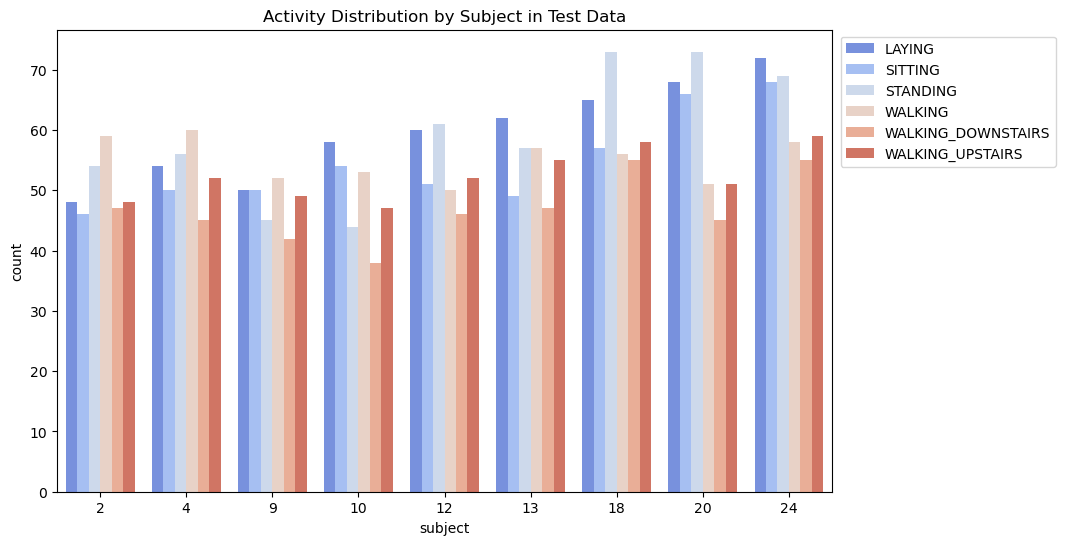

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(activity_count,x="subject",y="count",hue="Activity",palette="coolwarm")
plt.title("Activity Distribution by Subject in Test Data")
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1))
plt.show()


#### Insights:
* In test data, there is no great difference between activities done by each subject.
* Subject 18 and 20 prefer standing the most whereas subject 2 and 4 prefer waliking.
* Subject 24 prefers laying more than other activities.
* Walking upstairs is more done than walking downstairs in all subjects.

### 7.Pair plot

A pairplot was used to visualize the relationships between the first five features of the dataset. Due to the high dimensionality of the data, only these features were selected for clearer insights. The pairplot helped identify correlations and patterns that could inform feature selection and model optimization.



<Figure size 1000x800 with 0 Axes>

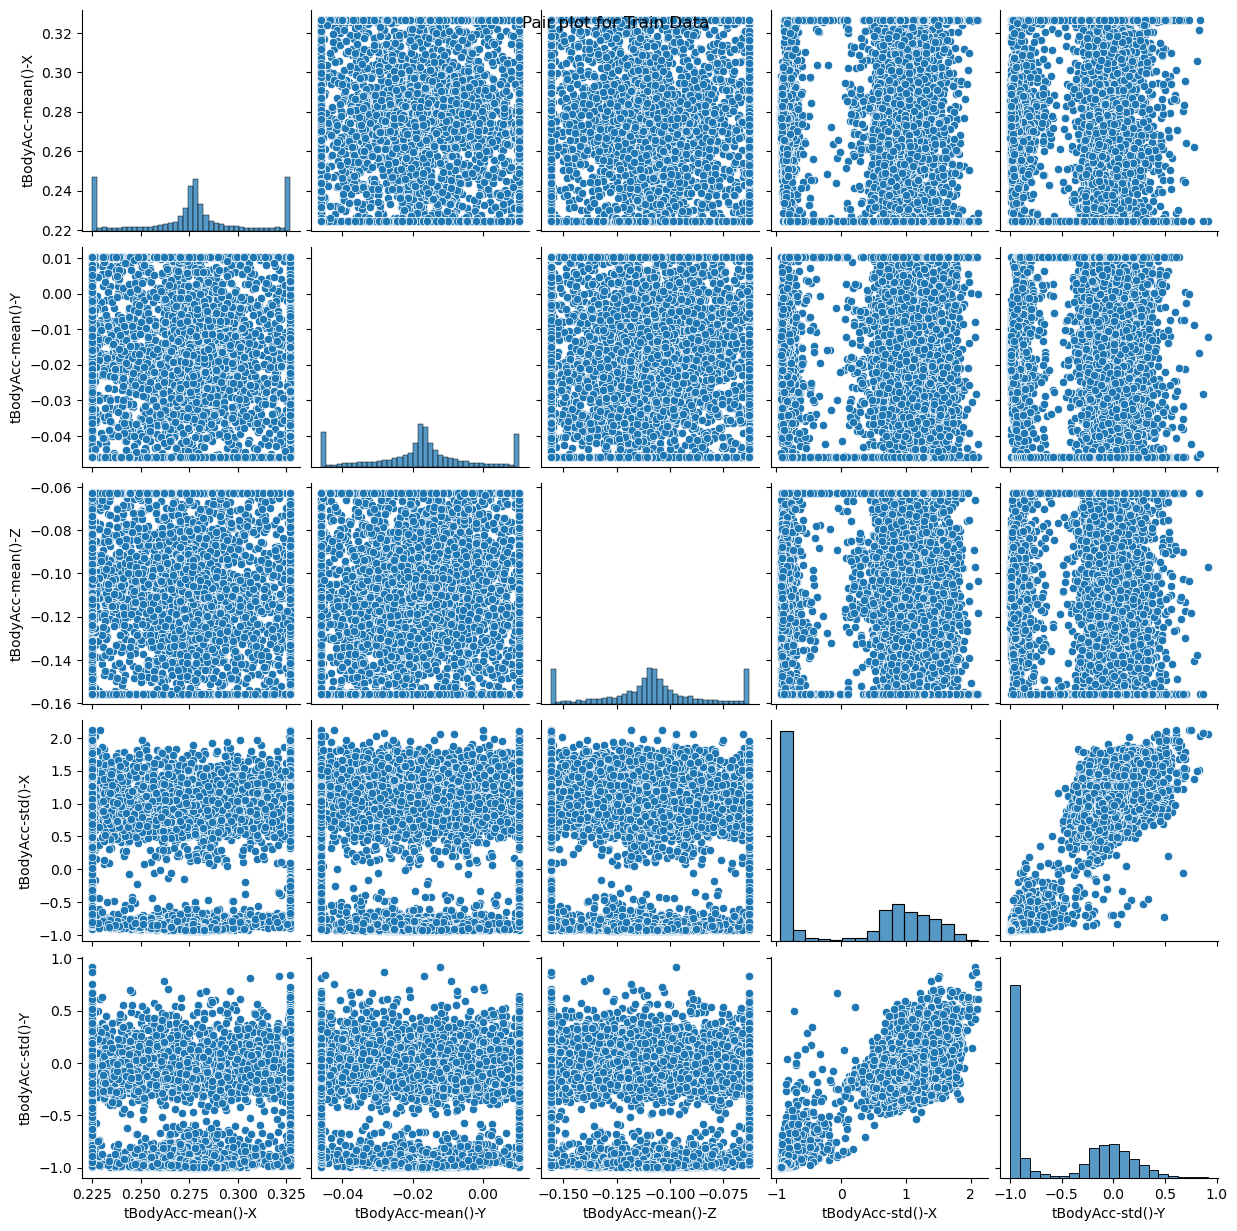

In [74]:
# Pair plot for Train Data
plt.figure(figsize=(10,8))
sns.pairplot(train_data.iloc[:, :5])
plt.suptitle("Pair plot for Train Data")
plt.show()


### Insights:
Most of the scatter plots are not well defined.Standard deviation of time domain body accelerator in x axis and y axis have a linear relationship, that is ,when x values increases , y value also increases.

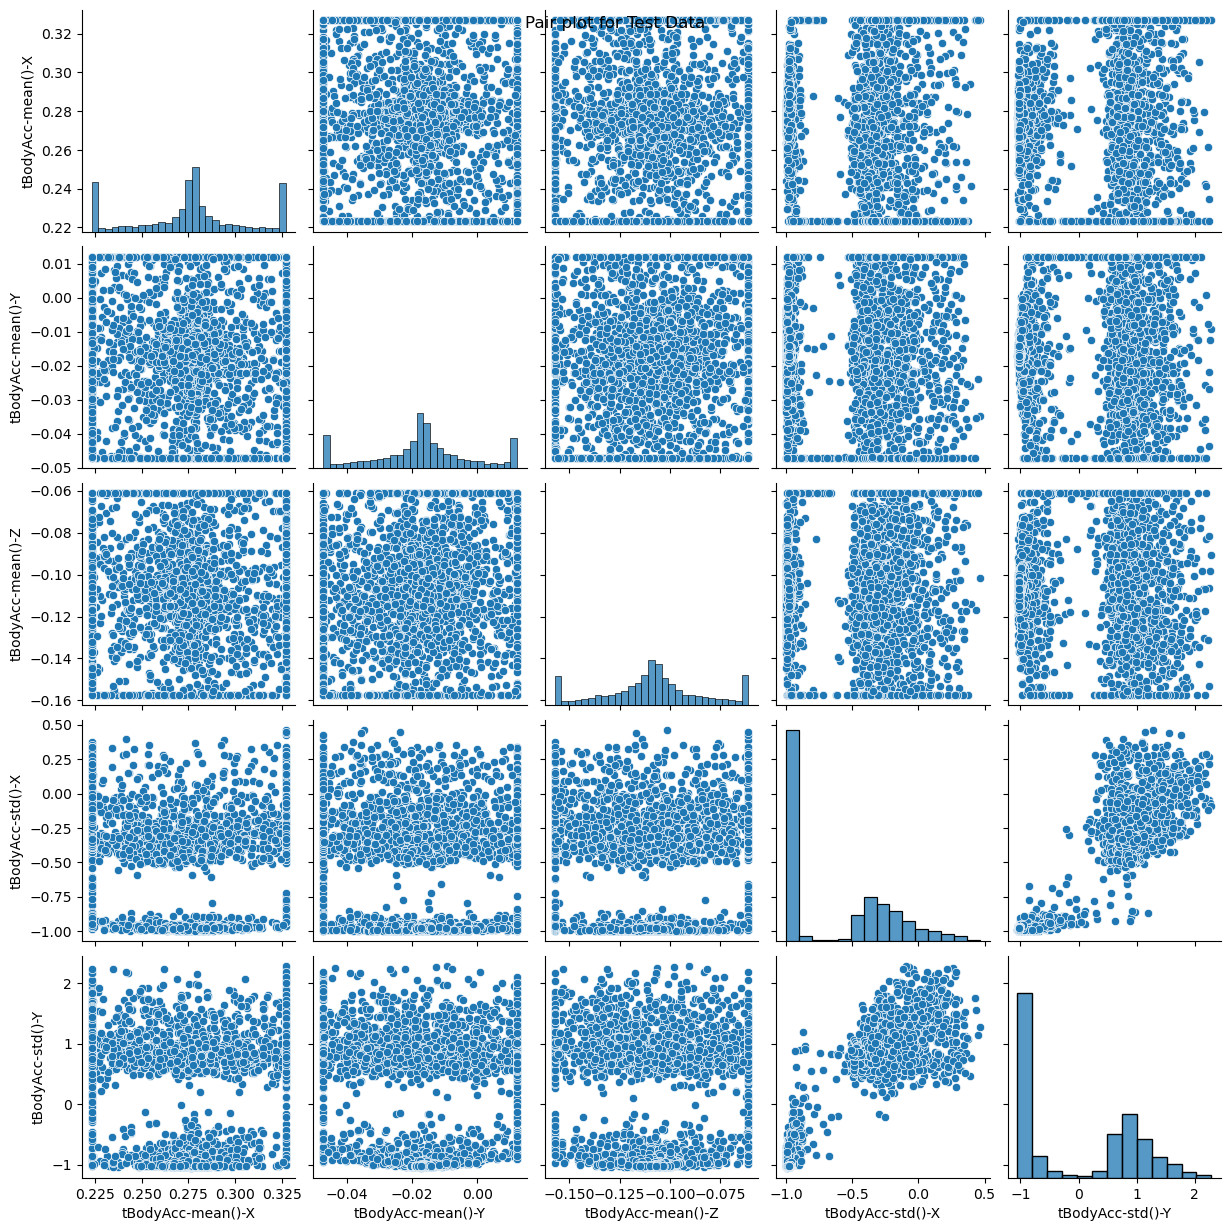

In [76]:
# Pair plot for Test Data
sns.pairplot(test_data.iloc[:, :5])
plt.suptitle("Pair plot for Test Data")
plt.show()

### Insights:
Same as training data , in test data also tBody Acc std X and tBody Acc std Y have a linear relationship.

### 8.Correlation Heatmaps
The correlation heatmap below visualizes the relationships between selected frequency-based features (columns 50 to 63) in our dataset. Given the high dimensionality (562 features), plotting a complete heatmap would be impractical. Instead, we focus on this subset to identify key patterns. Strong positive or negative correlations indicate dependencies between certain features, which can help in feature selection and model optimization.

<Axes: >

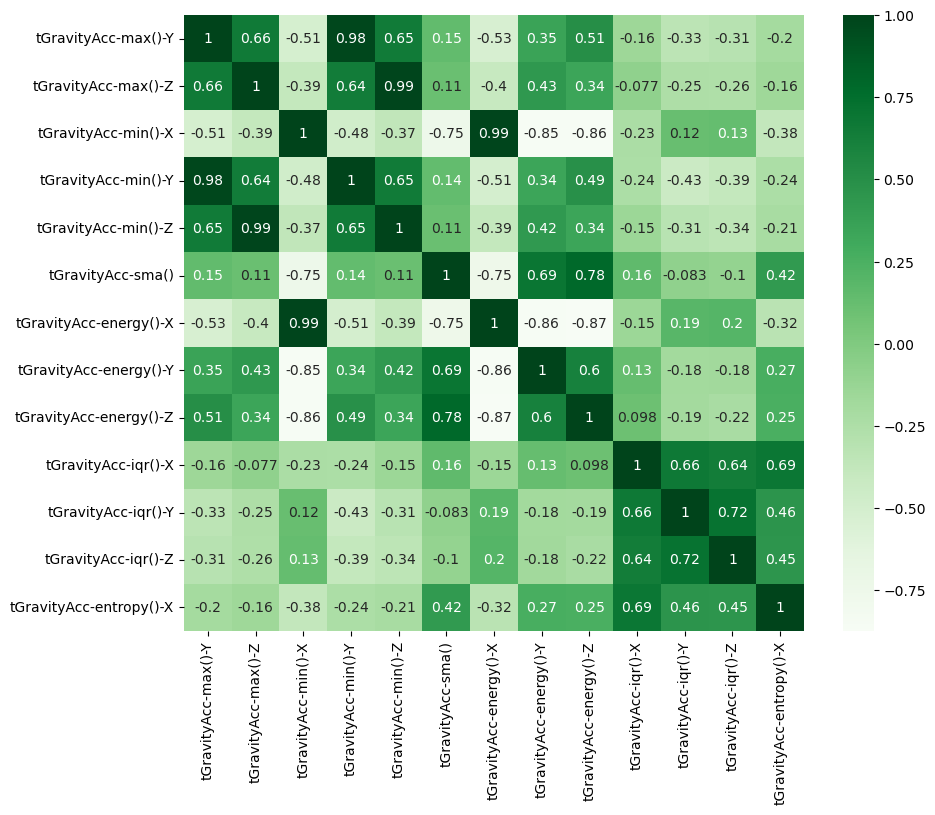

In [79]:
plt.figure(figsize=(10,8))
selected_train=train_data.iloc[:,50:63]
sns.heatmap(selected_train.corr(),annot=True,cmap="Greens")

### Insights:
Maximum time domain gravity accelerator in x,y,z  have high correlation with corresponding minimum values. Time domain gravity accelerator energy in X axis is highly correlated with time domain gravity accelerator X minimum values.

<Axes: >

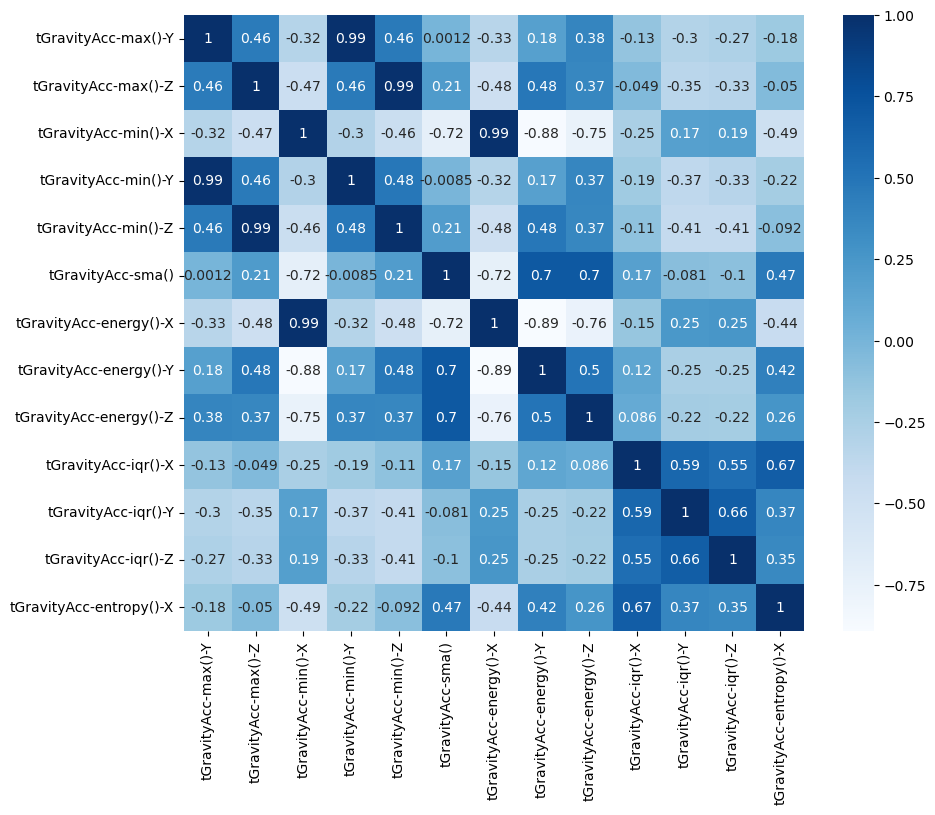

In [81]:
plt.figure(figsize=(10,8))
selected_test=test_data.iloc[:,50:63]
sns.heatmap(selected_test.corr(),annot=True,cmap="Blues")

### Insights:
Same as that of training data . Maximum time domain gravity accelerator in x,y,z have highly positive correlation with its corresponding minimum values.

### Feature Engineering

#### Encoding

Encoding was applied to convert categorical variables into numerical representations for machine learning models.Since the target variable was categorical, Label Encoding is used . Train data is encoded using fit_transform whereas test data is encoded without refitting ensuring consistency and preventing data leakage.


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
joblib.dump(le, "le.pkl")
train_data["Activity"] = le.fit_transform(train_data["Activity"])
test_data["Activity"] = le.transform(test_data["Activity"])
train_data["Activity"]

0       2
1       2
2       2
3       2
4       2
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: Activity, Length: 7352, dtype: int32

### Splitting Data for train and test

Since the dataset contain separate train and test data ,we can split manually by dropping target column which is activity and the subject column which is not required to build a model.

In [87]:
X_train =train_data.drop(["Activity","subject"],axis=1)
y_train =train_data["Activity"]
X_test = test_data.drop(["Activity","subject"],axis=1)
y_test = test_data["Activity"]
print("X train shape : ",X_train.shape)
print("X test shape : ",X_test.shape)
print("y train shape : ",y_train.shape)
print("y test shape : ",y_test.shape)

X train shape :  (7352, 561)
X test shape :  (2947, 561)
y train shape :  (7352,)
y test shape :  (2947,)


### Applying SMOTE

In [89]:
train_data["Activity"].value_counts()

Activity
0    1407
2    1374
1    1286
3    1226
5    1073
4     986
Name: count, dtype: int64

 SMOTE (Synthetic Minority Over-sampling Technique) is applied to address class imbalance in the dataset. Since some activities had significantly fewer samples than others, training the model without balancing the dataset could lead to biased predictions favoring majority classes.

SMOTE was used to generate synthetic samples for underrepresented activities, ensuring a balanced distribution in the training set. This helped:

* Prevent model bias toward majority activities.
* Improve classification performance, especially for minority classes.
* Enhance generalization, leading to better recognition of all activity types.

Importantly, SMOTE is applied only to the training data to maintain the real-world distribution of test data.

In [91]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("X train shape : ",X_train_resampled.shape)
print("y train shape : ",y_train_resampled.shape)


X train shape :  (8442, 561)
y train shape :  (8442,)


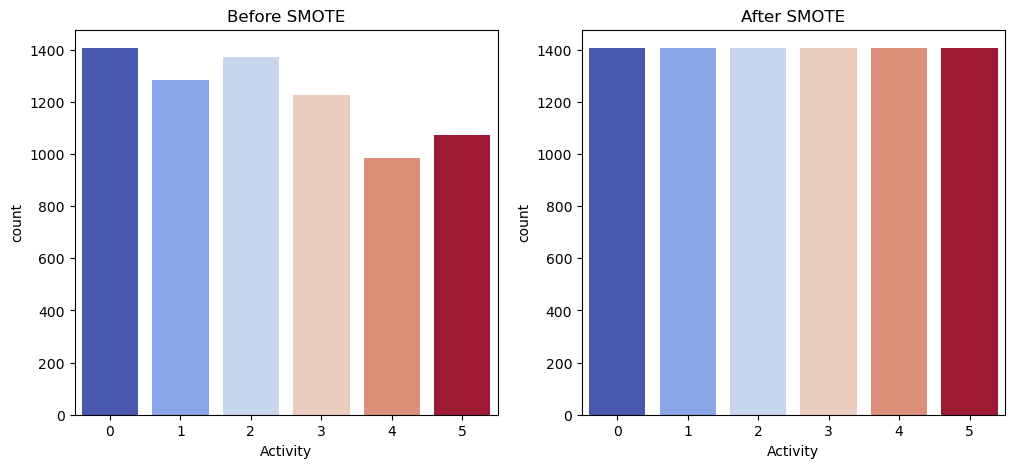

In [92]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=y_train,hue=y_train,palette="coolwarm",legend=False)
plt.title("Before SMOTE")

plt.subplot(1,2,2)
sns.countplot(x=y_train_resampled,hue=y_train_resampled,palette="coolwarm",legend=False)
plt.title("After SMOTE")
plt.show()


In [93]:
y_aftersmote=pd.DataFrame(y_train_resampled)
y_aftersmote.value_counts()

Activity
0           1407
1           1407
2           1407
3           1407
4           1407
5           1407
Name: count, dtype: int64

### Feature Scaling

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

### Feature Selection using L1 regularisation

* L1 Regularization (Lasso) was used to perform feature selection and reduce dimensionality.
* Applied Logistic Regression with L1 penalty to eliminate irrelevant features by driving their coefficients to zero.
* Threshold of 0.005 was set to select the most important features from the dataset.
* After feature selection, the training and test datasets were transformed based on the selected features.
* L1 regularization helped simplify the model, improve interpretability, and reduce overfitting.
* Focused on a smaller subset of relevant features, which enhanced the model's performance and generalization ability.

In [98]:
# Train a Logistic Regression model
l1_selector = SelectFromModel(LogisticRegression(penalty='l1', solver='saga', C=0.1, max_iter=500), threshold=0.005)
X_train_selected = l1_selector.fit_transform(X_train_scaled, y_train_resampled)
X_test_selected = l1_selector.transform(X_test_scaled)


# Get selected feature mask
selected_features_mask = l1_selector.get_support()

# Get the feature names that were selected
selected_features = X_train.columns[selected_features_mask]

print("Selected Features after L1 Regularization:")
print(selected_features)

Selected Features after L1 Regularization:
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,4',
       ...
       'fBodyBodyGyroMag-skewness()', 'fBodyBodyGyroMag-kurtosis()',
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyGyroJerkMag-skewness()',
       'fBodyGyroJerkMag-kurtosis()', 'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=189)


C:\Users\BIT LOGIC\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [99]:
print("X_train shape:", X_train_selected.shape)
print("X_test shape:", X_test_selected.shape)

X_train shape: (8442, 189)
X_test shape: (2947, 189)


### Principal Component Analysis

In this project, Principal Component Analysis (PCA) was used to reduce the dimensionality of the dataset while retaining 90% of the variance. To determine the optimal number of components, the cumulative sum of explained variance was plotted. Based on this, 53 principal components were selected. PCA was then applied to transform the dataset, reducing it to 53 new features that effectively represent the original data with minimized complexity.



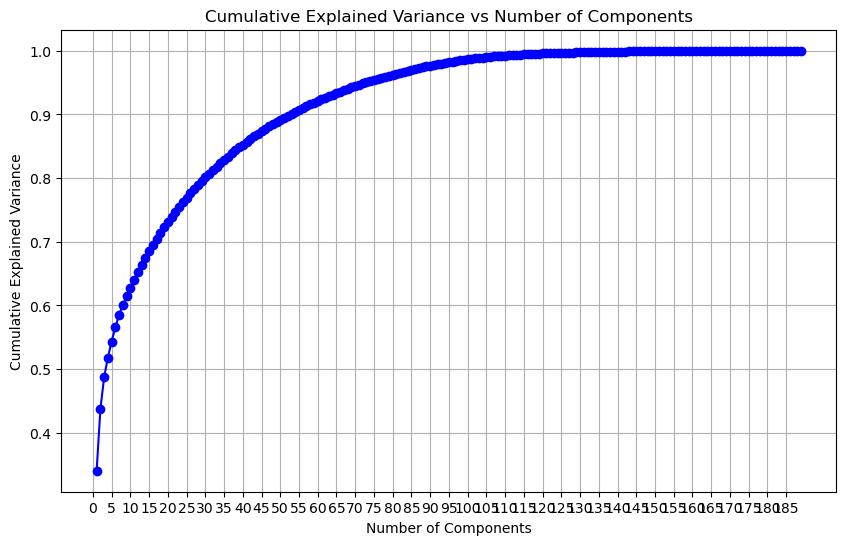

In [102]:
pca = PCA()
X_pca = pca.fit(X_train_selected)
explained_variance= np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(0, len(explained_variance) + 1, 5))
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

In [103]:
pca=PCA(n_components=0.90)
Xtrain_pca=pca.fit_transform(X_train_selected)
Xtest_pca=pca.transform(X_test_selected)
print("Xtrain_pca shape=",Xtrain_pca.shape)
print("Xtest_pca shape=",Xtest_pca.shape)

total_variance = sum(pca.explained_variance_ratio_)
print("Total variance explained by the selected components:", total_variance)

Xtrain_pca shape= (8442, 53)
Xtest_pca shape= (2947, 53)
Total variance explained by the selected components: 0.9012422046417121


In [104]:
# Rename the new PCA features
pca_feature_names = [f'PC{i+1}' for i in range(53)]
X_train_pca = pd.DataFrame(Xtrain_pca, columns=pca_feature_names)
X_test_pca = pd.DataFrame(Xtest_pca, columns=pca_feature_names)
print(X_train_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.247474  3.185051  3.594761 -3.285714 -5.764733  2.962752 -0.592898   
1  8.230498  1.053195  4.694975 -1.309567 -2.615865 -0.824521  1.123959   
2  8.204264 -0.815525  5.924447 -1.129066 -0.117002  0.936614  0.982328   
3  8.788525 -1.786434  5.061540  0.116008 -1.879256  1.687947  0.397160   
4  8.711604 -2.521316  5.021231  0.850752 -0.771775  0.311503  0.567346   

        PC8       PC9      PC10  ...      PC44      PC45      PC46      PC47  \
0 -0.465167 -2.942777 -0.567268  ...  1.018630  1.983245 -2.047234  0.879033   
1 -1.219546 -1.132186  1.008809  ... -0.179415  0.147068  0.650255 -0.222969   
2  1.415509 -0.232025  0.039701  ...  0.177525 -0.970945  0.203750  0.656301   
3  0.397210 -1.111211  1.829062  ... -0.302339 -0.858550 -0.913243 -0.314477   
4  0.425755  0.827014  0.984643  ...  0.499059  0.513057  1.370106  1.006504   

       PC48      PC49      PC50      PC51      PC52      PC53  
0 -0

##**Building the Machine Learning Model**

### Train and Test Shape

In [107]:
# print the shape of X train,y train, X test, y test
y_train_smp =y_train_resampled
print("X train shape : ",X_train_pca.shape)
print("y train shape : ",y_train_smp.shape)
print("X test shape : ",X_test_pca.shape)
print("y test shape : ",y_test.shape)

X train shape :  (8442, 53)
y train shape :  (8442,)
X test shape :  (2947, 53)
y test shape :  (2947,)


In [108]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'Support Vector Classifier' : SVC(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier()
    }

# Fit the models
for model_name, model in models.items():
    model.fit(X_train_pca, y_train_smp)

## **Model Evaluation**

Model: LogisticRegression
Accuracy (Train): 0.9707
Accuracy (Test): 0.8958
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       537
           1       0.83      0.86      0.84       491
           2       0.88      0.91      0.90       532
           3       0.92      0.93      0.93       496
           4       0.87      0.96      0.91       420
           5       0.93      0.84      0.88       471

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



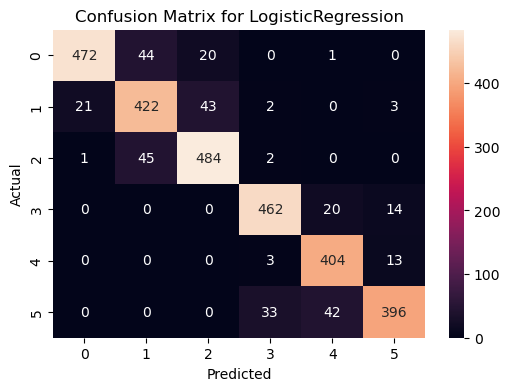

********************************************************************** 

Model: DecisionTreeClassifier
Accuracy (Train): 1.0000
Accuracy (Test): 0.7784
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       537
           1       0.65      0.66      0.65       491
           2       0.75      0.81      0.78       532
           3       0.77      0.82      0.79       496
           4       0.78      0.70      0.74       420
           5       0.81      0.82      0.81       471

    accuracy                           0.78      2947
   macro avg       0.78      0.78      0.78      2947
weighted avg       0.78      0.78      0.78      2947



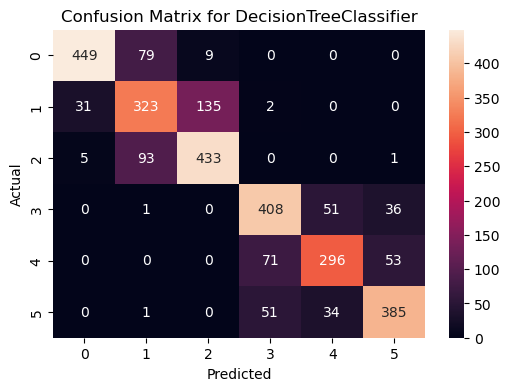

********************************************************************** 

Model: RandomForestClassifier
Accuracy (Train): 1.0000
Accuracy (Test): 0.9067
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       537
           1       0.85      0.84      0.84       491
           2       0.89      0.92      0.91       532
           3       0.92      0.95      0.94       496
           4       0.91      0.86      0.89       420
           5       0.91      0.92      0.92       471

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



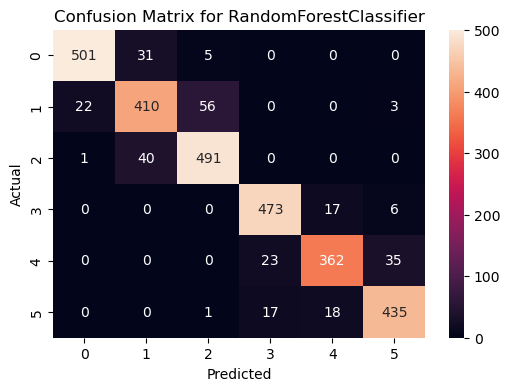

********************************************************************** 

Model: Support Vector Classifier
Accuracy (Train): 0.9874
Accuracy (Test): 0.9264
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       537
           1       0.87      0.89      0.88       491
           2       0.94      0.93      0.93       532
           3       0.95      0.96      0.96       496
           4       0.89      0.97      0.93       420
           5       0.94      0.87      0.90       471

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



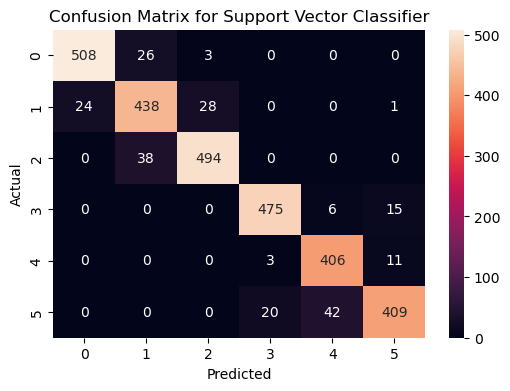

********************************************************************** 

Model: GradientBoostingClassifier
Accuracy (Train): 0.9908
Accuracy (Test): 0.8918
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       537
           1       0.79      0.86      0.82       491
           2       0.89      0.90      0.90       532
           3       0.90      0.97      0.93       496
           4       0.92      0.84      0.88       420
           5       0.90      0.90      0.90       471

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.90      0.89      0.89      2947



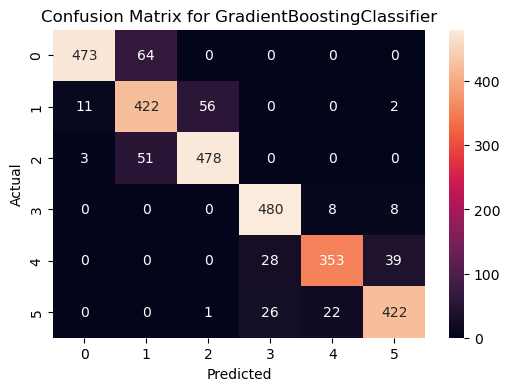

********************************************************************** 

Model: GaussianNB
Accuracy (Train): 0.9203
Accuracy (Test): 0.9060
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       537
           1       0.81      0.84      0.83       491
           2       0.89      0.91      0.90       532
           3       0.95      0.94      0.95       496
           4       0.93      0.89      0.91       420
           5       0.91      0.95      0.93       471

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



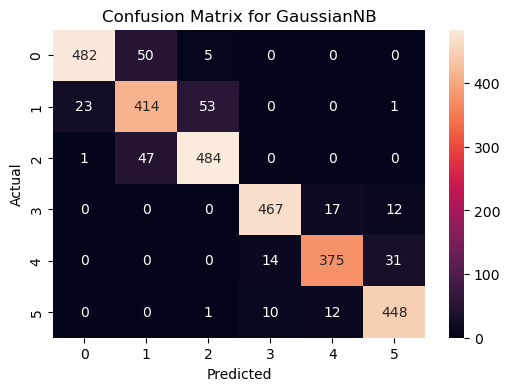

********************************************************************** 

Model: KNeighborsClassifier
Accuracy (Train): 0.9860
Accuracy (Test): 0.8856
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       537
           1       0.78      0.84      0.81       491
           2       0.86      0.92      0.89       532
           3       0.91      0.95      0.93       496
           4       0.89      0.91      0.90       420
           5       0.93      0.87      0.90       471

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.89      0.89      2947



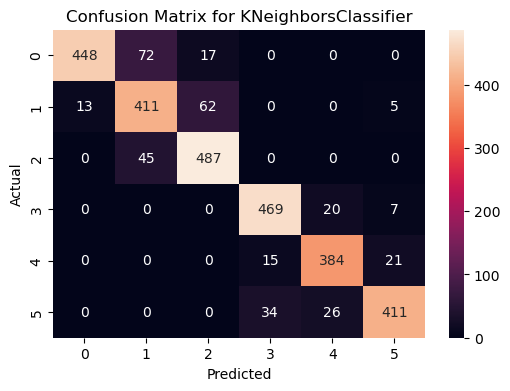

********************************************************************** 

                        model  accuracy_train  accuracy  precision    recall  \
3   Support Vector Classifier        0.987444  0.926366   0.925752  0.926553   
2      RandomForestClassifier        1.000000  0.906685   0.906398  0.905004   
5                  GaussianNB        0.920280  0.906006   0.907333  0.906015   
0          LogisticRegression        0.970742  0.895826   0.896853  0.897054   
4  GradientBoostingClassifier        0.990760  0.891754   0.894512  0.890495   
6        KNeighborsClassifier        0.986022  0.885646   0.889123  0.886534   
1      DecisionTreeClassifier        1.000000  0.778419   0.780075  0.775438   

   f1_score  
3  0.925665  
2  0.905434  
5  0.906332  
0  0.895798  
4  0.891336  
6  0.886413  
1  0.776701  


In [110]:
results = []

# Make predictions
for model_name, model in models.items():

    y_train_pred = model.predict(X_train_pca)
    y_pred = model.predict(X_test_pca)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train_smp, y_train_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    # Append results
    results.append({
        'model': model_name,
        'accuracy_train': accuracy_train,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    })

    # Print metrics
    print(f"Model: {model_name}")
    print(f"Accuracy (Train): {accuracy_train:.4f}")
    print(f"Accuracy (Test): {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, fmt="d", annot=True, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("*" * 70, "\n")


# Convert results to DataFrame
results_df = pd.DataFrame(results)


# Sort by accuracy
results_df = results_df.sort_values("accuracy", ascending=False)

# Display sorted resul
print(results_df[['model', 'accuracy_train', 'accuracy', 'precision', 'recall', 'f1_score']])


### Model Evaluation Results (Before Hyperparameter Tuning)

After applying preprocessing steps, including L1 regularization, PCA, and SMOTE, I evaluated multiple classification models. The performance of the models is summarized below:

#### Support Vector Classifier (SVC):
* This model achieved the highest test accuracy of **92.67%**. It demonstrated a strong balance between precision, recall, and F1 score.
* The SVC performed well, likely due to its ability to capture complex decision boundaries in the high-dimensional feature space.

#### Gaussian Naive Bayes:
* With a test accuracy of **90.84%**, this model performed well, maintaining a good balance in precision, recall, and F1 score.
* The Gaussian Naive Bayes model was fast and effective, benefiting from its simplicity and the normally distributed nature of the features.

#### Random Forest Classifier:
* Despite achieving 100% accuracy on the training data, the Random Forest model showed a slightly lower test accuracy of **90.74%**.
* It had strong precision, recall, and F1 scores, indicating that it was robust in handling class imbalances and overfitting was well controlled.

#### Logistic Regression:
* With an accuracy of **89.62%**, Logistic Regression performed reasonably well, benefiting from the feature selection done through L1 regularization. * It showed strong precision and recall, though it could not outperform SVC or Naive Bayes.

#### Gradient Boosting Classifier:
* The Gradient Boosting model demonstrated a solid test accuracy of **89.45%**, with good precision and recall.
* While its performance was competitive, it was slightly lower than other models like SVC and Gaussian Naive Bayes.

#### K-Nearest Neighbors (KNN):
* The KNN classifier performed with a test accuracy of **88.50%**, placing it behind models like SVC and Naive Bayes.
* KNN is known to be sensitive to the selection of neighbors and the distance metric, which may have contributed to its lower performance in this case.

#### Decision Tree Classifier:
* Although this model achieved 100% accuracy on the training data, its test accuracy dropped to **77.71%**, indicating overfitting.
* The Decision Tree did not generalize well on the unseen data, making it less suitable for this project.

#### Conclusion:
* Support Vector Classifier (SVC) performed the best with the highest test accuracy and a strong balance of precision, recall, and F1 score.
* Other models like Random Forest and Gaussian Naive Bayes also showed good performance, but hyperparameter tuning could further improve these models' accuracy and generalization to unseen data.



## **Hyperparameter Tuning**


For hyperparameter tuning, I focused on selecting the best-performing models based on their initial evaluation metrics. After evaluating multiple models, I shortlisted those that demonstrated strong potential for improvement through hyperparameter optimization. By using grid search and cross-validation, I fine-tuned only the top-performing models, such as Logistic Regression, Random Forest, Gaussian Naive bayes
and Support Vector Classifier (SVC), ensuring that the tuning process was both efficient and effective. This approach allowed me to invest time and resources in optimizing the models that had the highest likelihood of improving, while avoiding unnecessary tuning of models that did not perform as well.

In [114]:
param_grid = {
   'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs','saga'],
        'max_iter': [100,200,500,1000]
        },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Support Vector Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
     },
    'GaussianNB': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]

   }
}


In [115]:
# List of models to tune
models_to_tune = ['Support Vector Classifier', 'GaussianNB', 'RandomForestClassifier', 'LogisticRegression']

best_params = {}  # Store best parameters for each model
results = []  # Store evaluation metrics

# Iterate through selected models only
for model_name, model in models.items():
    if model_name in models_to_tune:
        print(f"Checking model: {model_name}")  # Debug print
    
    if model_name in models_to_tune and model_name in param_grid:
        print(f"Tuning {model_name} with params: {param_grid[model_name]}")

        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_pca, y_train_smp)

        # Store best parameters
        best_params[model_name] = grid_search.best_params_

        print(f"Best parameters for {model_name}: {best_params[model_name]}\n")

        # Predictions on test data
        y_pred = grid_search.best_estimator_.predict(X_test_pca)

        # Performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Store results
        results.append({
            'model': model_name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'best_estimator': grid_search.best_estimator_  # Store the trained model
        })

# Convert results to DataFrame and sort by accuracy
results_df = pd.DataFrame(results).sort_values("accuracy", ascending=False)

# Save the best model
best_model = results_df.iloc[0]['best_estimator']  # Get the best model based on accuracy
joblib.dump(best_model, "Best_Model.pkl")

print("Best model saved as 'Best_Model.pkl'")
print(results_df[['model', 'accuracy', 'precision', 'recall', 'f1_score']])

Checking model: LogisticRegression
Tuning LogisticRegression with params: {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs', 'saga'], 'max_iter': [100, 200, 500, 1000]}


C:\Users\BIT LOGIC\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for LogisticRegression: {'C': 10, 'max_iter': 100, 'solver': 'saga'}

Checking model: RandomForestClassifier
Tuning RandomForestClassifier with params: {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
Best parameters for RandomForestClassifier: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Checking model: Support Vector Classifier
Tuning Support Vector Classifier with params: {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
Best parameters for Support Vector Classifier: {'C': 10, 'kernel': 'rbf'}

Checking model: GaussianNB
Tuning GaussianNB with params: {'var_smoothing': [1e-09, 1e-08, 1e-07]}
Best parameters for GaussianNB: {'var_smoothing': 1e-09}

Best model saved as 'Best_Model.pkl'
                       model  accuracy  precision    recall  f1_score
2  Support Vector Classifier  0.914489   0.915192  0.915227  0.913955
1     RandomForestClassifier  0.910078   0.908959  0.907987  0.908312
3            

### Hyperparameter Tuning Results
After hyperparameter tuning, the Support Vector Classifier emerged as the best-performing model with an accuracy of 91.44%, slightly outperforming the Random Forest Classifier at 91%. Both models delivered strong results, making them the top contenders for classification.

#### **Key Observations:**
* **SVC** is the best model, achieving the highest accuracy after tuning, benefiting from its ensemble learning approach.
* **RandomForestClassifier** performed very closely, with just a minor difference in accuracy, indicating its strong generalization capabilities.
* **Gaussian Naïve Bayes** delivered decent performance (90.60%), but it did not surpass the top models, likely due to its assumption of feature independence.
* **Logistic Regression** remained the least effective model (89.61%), showing limited improvement after tuning, suggesting it may not be the best fit for this dataset.
  
#### **Conclusion:**
While SVC slightly outperformed RandomForestClassifier , both models are excellent choices, with minimal difference in accuracy. The final selection may depend on additional factors such as interpretability, training time, and specific application needs.









## **Best Model**


In [118]:

# Print the best model's name and accuracy
best_model_name = results_df.iloc[0]['model']
best_model_accuracy = results_df.iloc[0]['accuracy']

print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {best_model_accuracy:.4f}")  # Print with 4 decimal places


Best Model: Support Vector Classifier
Accuracy: 0.9145


## **Pipeline**

In [120]:
# Encode target variable before fitting the pipeline
le = joblib.load("le.pkl")
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the pipeline without SMOTE
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Step 1: Scale data
    ("feature_selection", SelectFromModel(LogisticRegression(penalty='l1', solver='saga', C=0.1, max_iter=500), threshold=0.005)),  # Step 2: Feature Selection
    ("pca", PCA(n_components=0.95)),  # Step 3: PCA (Dimensionality Reduction)
    ("model",best_model)  # Step 4: Train Model
])

# Fit the pipeline using the resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Save pipeline
joblib.dump(pipeline, "pipeline.pkl")
print("Pipeline saved as 'pipeline.pkl'")

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\BIT LOGIC\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline saved as 'pipeline.pkl'
Accuracy: 0.9300984051577876
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       537
           1       0.89      0.89      0.89       491
           2       0.95      0.94      0.94       532
           3       0.96      0.97      0.97       496
           4       0.88      0.97      0.92       420
           5       0.94      0.85      0.90       471

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



## **Unseen Data**

In [122]:
df = pd.read_csv(r"C:\Users\BIT LOGIC\Downloads\unseen_data.csv")
df

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0            0.200467          -0.026279          -0.086678         -0.396860   
1            0.275680          -0.020413          -0.124188         -0.996673   
2            0.274629           0.002954          -0.117819         -0.283561   
3            0.268009          -0.020608          -0.102512         -0.984980   
4            0.267003          -0.016659          -0.106948         -0.958097   
..                ...                ...                ...               ...   
95           0.277655          -0.017433          -0.110961         -0.997269   
96           0.336843          -0.073423          -0.149043         -0.301164   
97           0.357710          -0.035391          -0.103498         -0.938105   
98           0.281464          -0.019343          -0.117886         -0.994127   
99           0.249039          -0.021119          -0.124934         -0.490940   

    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0           0.033448         -0.596704         -0.418465          0.020370   
1          -0.987446         -0.986685         -0.996855         -0.987414   
2           0.113636         -0.156525         -0.346340          0.117079   
3          -0.963945         -0.978984         -0.987515         -0.961465   
4          -0.985626         -0.977424         -0.960699         -0.985140   
..               ...               ...               ...               ...   
95         -0.991750         -0.988424         -0.997489         -0.991040   
96          0.574556         -0.364684         -0.329553          0.625624   
97         -0.911146         -0.952872         -0.939084         -0.911805   
98         -0.974379         -0.969996         -0.994386         -0.974936   
99         -0.197666         -0.584284         -0.533768         -0.179288   

    tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0          -0.576275         -0.115401  ...                        -0.693328   
1          -0.987153         -0.940966  ...                        -0.887168   
2          -0.086709         -0.054044  ...                        -0.837790   
3          -0.975730         -0.924179  ...                         0.031538   
4          -0.973546         -0.906325  ...                        -0.757963   
..               ...               ...  ...                              ...   
95         -0.987732         -0.943033  ...                        -0.906936   
96         -0.391828         -0.215107  ...                        -0.737630   
97         -0.958296         -0.852659  ...                        -0.189030   
98         -0.967795         -0.935699  ...                        -0.663234   
99         -0.582582         -0.334934  ...                        -0.771536   

    angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                      0.627971                             -0.060001   
1                     -0.066898                              0.032218   
2                      0.158464                              0.456646   
3                     -0.086479                              0.193677   
4                     -0.066887                             -0.140160   
..                          ...                                   ...   
95                     0.196439                             -0.046349   
96                    -0.447768                              0.698645   
97                     0.298035                             -0.703922   
98                    -0.046497                              0.120761   
99                     0.498968                             -0.065464   

    angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                           0.859675                             -0.802659   
1                          -0.494242                              0.284878   
2                     

In [123]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 440.0+ KB


In [124]:
df.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count         100.000000         100.000000         100.000000   
mean            0.274702          -0.015001          -0.111018   
std             0.056855           0.025224           0.026618   
min             0.051028          -0.073423          -0.223276   
25%             0.267758          -0.024929          -0.124119   
50%             0.277599          -0.017423          -0.108778   
75%             0.288463          -0.012156          -0.100475   
max             0.424366           0.152300          -0.040679   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count        100.000000        100.000000        100.000000        100.000000   
mean          -0.609658         -0.467617         -0.659461         -0.632146   
std            0.426549          0.559957          0.360265          0.403947   
min           -0.998174         -0.995505         -0.995778         -0.998288   
25%           -0.992893         -0.978366         -0.978738         -0.993365   
50%           -0.904524         -0.844053         -0.898143         -0.904467   
75%           -0.279334         -0.035098         -0.320646         -0.321858   
max            0.341893          0.980106          0.170722          0.318190   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count        100.000000        100.000000        100.000000  ...   
mean          -0.484507         -0.665241         -0.469887  ...   
std            0.541951          0.351863          0.537005  ...   
min           -0.995456         -0.994694         -0.943975  ...   
25%           -0.977747         -0.976817         -0.936260  ...   
50%           -0.858126         -0.892392         -0.850046  ...   
75%           -0.088104         -0.314985          0.009911  ...   
max            0.987855          0.169069          0.743828  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                       100.000000                       100.000000   
mean                         -0.298045                        -0.610871   
std                           0.322168                         0.296988   
min                          -1.000000                        -0.988291   
25%                          -0.553979                        -0.846784   
50%                          -0.337487                        -0.705670   
75%                          -0.093731                        -0.412390   
max                           0.509683                         0.327002   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                   100.000000                            100.000000   
mean                     -0.020916                              0.012360   
std                       0.375493                              0.462449   
min                      -0.923416                             -0.877871   
25%                      -0.174706                             -0.292844   
50%                       0.002390                              0.002730   
75%                       0.153985                              0.276447   
max                       0.857254                              0.937227   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                        100.000000                            100.000000   
mean                          -0.008997                              0.001949   
std                            0.641830                              0.465516   
min                           -0.981035                             -0.879392   
25%                           -0.495746                             -0.389756   
50%                           -0.110545                             -0.035604   
75%                            0.620867                              0.335354   
max                            0.989663                     

In [125]:
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [126]:
df.duplicated().sum()

0

There is neither null values nor duplicates.

In [128]:
# Renaming some columns
df.rename(columns={
    "fBodyBodyGyroJerkMag-skewness()": "fBodyGyroJerkMag-skewness()",
    "fBodyBodyGyroJerkMag-kurtosis()": "fBodyGyroJerkMag-kurtosis()"
}, inplace=True)


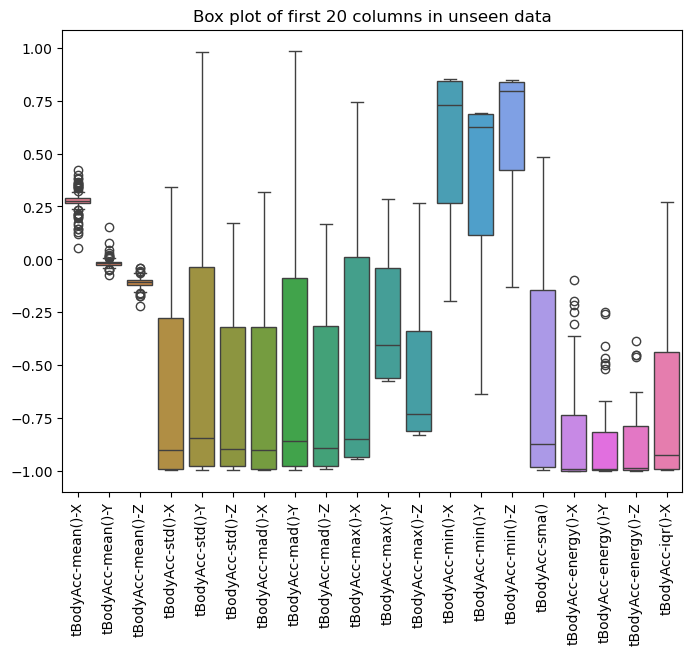

In [129]:
plt.figure(figsize=(8,6))
sns.boxplot(df.iloc[:,:20])
plt.xticks(rotation=90)
plt.title("Box plot of first 20 columns in unseen data")
plt.show()

#### Insights:
Boxplot suggests the presence of outliers, which can be handled by clipping with lower and upper bound values.

In [131]:
# Applying function clip outliers igr to clip outliers
data =clip_outliers_iqr(df)


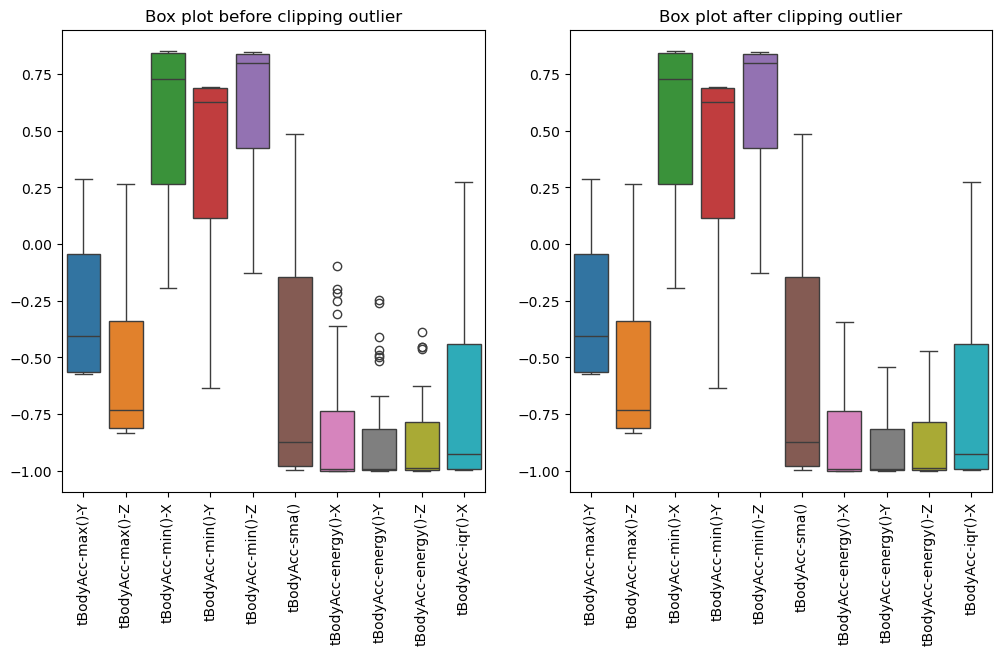

In [132]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(df.iloc[:,10:20])
plt.xticks(rotation=90)
plt.title("Box plot before clipping outlier")

plt.subplot(1,2,2)
sns.boxplot(data.iloc[:,10:20])
plt.xticks(rotation=90)
plt.title("Box plot after clipping outlier")
plt.show()


In [133]:
data.skew(numeric_only=True).sort_values(ascending=False)

fBodyGyro-maxInds-Y                  1.526545
fBodyGyro-bandsEnergy()-25,32        1.414218
fBodyAccJerk-bandsEnergy()-1,16.1    1.412141
tBodyAccJerk-energy()-Y              1.404934
fBodyAccJerk-energy()-Y              1.404791
                                       ...   
tGravityAcc-energy()-X              -1.139541
tGravityAcc-mean()-X                -1.146006
tBodyGyroJerk-min()-Y               -1.188344
angle(Y,gravityMean)                -1.192198
tBodyGyroJerk-min()-Z               -1.215826
Length: 562, dtype: float64

In [134]:
# select numerical features and apply skew function
from scipy.stats import skew
num = data.select_dtypes(include="number").columns
skewed_features= data[num].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Ensure we extract column names properly
skewed_columns = skewed_features[abs(skewed_features) > 0.5].index
skewed_columns

Index(['fBodyGyro-maxInds-Y', 'fBodyGyro-bandsEnergy()-25,32',
       'fBodyAccJerk-bandsEnergy()-1,16.1', 'tBodyAccJerk-energy()-Y',
       'fBodyAccJerk-energy()-Y', 'fBodyAccJerk-bandsEnergy()-1,24.1',
       'fBodyAccJerk-bandsEnergy()-1,24.2', 'fBodyGyro-bandsEnergy()-1,8',
       'fBodyAcc-bandsEnergy()-9,16.1', 'fBodyAcc-bandsEnergy()-17,24.1',
       ...
       'tBodyAcc-min()-Z', 'tBodyGyro-min()-Y', 'tGravityAcc-max()-X',
       'tGravityAcc-min()-X', 'tBodyGyro-min()-Z', 'tGravityAcc-energy()-X',
       'tGravityAcc-mean()-X', 'tBodyGyroJerk-min()-Y', 'angle(Y,gravityMean)',
       'tBodyGyroJerk-min()-Z'],
      dtype='object', length=388)

In [135]:
# Applying yeo-Johnson method on skewed columns
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
data[skewed_columns] = pt.fit_transform(data[skewed_columns])
data.skew(numeric_only=True).sort_values(ascending=False)

C:\Users\BIT LOGIC\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


tGravityAcc-entropy()-Y            1.087532
fBodyAcc-bandsEnergy()-57,64.2     0.842912
fBodyGyro-bandsEnergy()-57,64      0.825493
fBodyGyro-bandsEnergy()-17,24.1    0.782203
fBodyAcc-bandsEnergy()-57,64.1     0.781976
                                     ...   
tBodyGyroJerk-min()-Y             -0.551468
tGravityAcc-max()-X               -0.667860
tGravityAcc-min()-X               -0.689059
tGravityAcc-mean()-X              -0.728017
tGravityAcc-energy()-X            -0.734613
Length: 562, dtype: float64

In [140]:
# Assuming your unseen data has columns "subject" and "Activity"
X_unseen = data.drop(columns=["subject", "Activity"])  # Features only (exclude target)
y_unseen = data["Activity"]  # Target (Activity)

# load label encoder
le=joblib.load("le.pkl")

# Apply the same label encoding as done during training
y_unseen = le.fit_transform(y_unseen)

# Load the saved pipeline
pipeline = joblib.load("pipeline.pkl")

# Print the pipeline structure
print(pipeline)

# Make predictions
y_pred = pipeline.predict(X_unseen)

# Print predictions
print("Predicted Activities:", y_pred)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(C=0.1,
                                                              max_iter=500,
                                                              penalty='l1',
                                                              solver='saga'),
                                 threshold=0.005)),
                ('pca', PCA(n_components=0.95)), ('model', SVC(C=10))])
Predicted Activities: [3 2 5 0 0 4 5 5 4 4 3 0 0 3 0 4 0 5 3 0 5 1 2 1 4 1 3 4 4 1 3 4 3 2 4 1 4
 4 0 3 2 2 0 5 0 4 2 2 4 3 0 0 4 1 2 4 3 1 0 1 2 4 5 4 0 4 5 1 5 2 0 3 0 3
 2 0 1 3 1 2 5 0 1 4 0 1 0 2 3 3 2 0 0 2 1 1 5 0 1 3]


In [142]:
y_unseen

array([3, 2, 5, 0, 0, 4, 5, 5, 4, 5, 3, 1, 0, 3, 0, 4, 0, 5, 3, 0, 5, 1,
       2, 1, 4, 1, 3, 4, 5, 1, 3, 4, 3, 2, 4, 1, 4, 4, 0, 3, 2, 2, 0, 5,
       0, 5, 2, 2, 4, 3, 0, 0, 4, 1, 2, 4, 3, 1, 0, 1, 1, 4, 5, 4, 0, 4,
       5, 1, 5, 2, 0, 3, 0, 5, 2, 0, 1, 3, 1, 1, 5, 0, 1, 4, 0, 1, 0, 2,
       3, 3, 2, 0, 0, 2, 1, 1, 5, 0, 1, 3])

In [144]:
# Evaluate the model performance on unseen data
print("Accuracy:", accuracy_score(y_unseen, y_pred))
print(classification_report(y_unseen, y_pred))

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.84      0.91        19
           2       0.87      1.00      0.93        13
           3       0.94      1.00      0.97        15
           4       0.84      1.00      0.91        16
           5       1.00      0.73      0.85        15

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.92       100
weighted avg       0.94      0.93      0.93       100



The model performed well on the unseen data with an accuracy of 93%. The precision, recall, and F1 scores vary slightly across the different classes, but overall, the model demonstrates strong performance in classifying activities. Some classes, like 0, 2, and 3, show nearly perfect classification, while others, like class 1, exhibit slight challenges in recall, indicating some missed predictions. Despite this, the model's performance remains reliable and consistent across most classes, making it effective for real-world activity classification tasks.

## **Conclusion**

This project demonstrates the successful application of machine learning techniques for activity recognition, achieving impressive results through a well-structured pipeline. Key steps, including data preprocessing, feature scaling, feature selection, and dimensionality reduction with PCA, were effectively implemented to enhance model performance. By addressing class imbalance using SMOTE and performing thorough hyperparameter tuning, the final model achieved a high accuracy of 93% on unseen data. This indicates that the model can reliably classify activities, showcasing its potential for real-world applications, particularly in fields like health monitoring, fitness tracking, and human-computer interaction.

## **Future Work**

While the current model performs well, there are several ways to improve it:

* **Better Features**: Adding more useful data patterns, such as movement trends over time, could improve accuracy.
* **Advanced Models**: Trying deep learning methods like RNNs or transformers may help recognize activities more accurately.
* **Real-Time Use**: Adapting the model for wearable devices or smartphones could enable instant activity detection.
* **Wider Application**: Training the model on different datasets can make it work well in various real-life situations.
* **Faster & Scalable**: Optimizing the model for speed and efficiency will help deploy it on larger systems.

Overall, the current work sets a strong foundation for future research and applications, with exciting opportunities for improvement and expansion to achieve greater accuracy, usability, and versatility in the activity recognition domain.





